In [4]:
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import *
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import *
# from dataProcessingHelpers import sliding_window
from numpy.lib.stride_tricks import sliding_window_view
import os
import matplotlib.pyplot as plt
# from helpers import get_NWP_data, sw_func,find_experiment_directory,create_dataset

In [8]:
import pyodbc
def connect_to_db():
    """
    Tengist VHG með pyodbc pakkanum
    """
    sql_conn = pyodbc.connect("""DRIVER={SQL Server};
                                 SERVER=VHG;
                                 DATABASE=Kerfiradur_mirror;
                                 Trusted_Connection=yes""")
    return sql_conn
def execute_query(conn, sql):
    return pd.read_sql(sql, conn, parse_dates=['ctime','date_time','value_dates'])


query = f'''
select * 
FROM [DM_Orkuveitan].[dbo].[fact_vedurgogn]
where date_time >= '2015-01-01' and station_id = 1475
    '''
conn = connect_to_db()
df_hitastig = execute_query(conn,query)
df_H = df_hitastig.pivot_table(columns='station_id',values='temperature',index = 'date_time')
df_H = pd.DataFrame(df_H.loc[:,1475])
df_H.index = pd.to_datetime(df_H.index)


In [9]:
df_cold = pd.read_csv('C:/Users/sverrirhd/Google Drive/Skóli/DTU/Thesis/Data/Drainage data/coldwater.csv')
df_cold.CTime = pd.to_datetime(df_cold.CTime)
df_cold = df_cold.loc[df_cold.CTime >= datetime.datetime(2015,1,1)]
df_cold_wide = df_cold.pivot_table(values = 'Val',columns = 'Name',index = 'CTime')

# rvk_columns = [col for col in df_cold_wide.columns if 'RVK' in col]
# df_cold_wide = df_cold_wide.loc[:,rvk_columns]

In [10]:
df_maelanofn = pd.read_csv('C:/Users/sverrirhd/Google Drive/Skóli/DTU/Thesis/Data/Drainage data/maelanofn.csv')

In [11]:
df_maelanofn.head(2)

old              new                old_start  \
0   K003HÚS-RA619  K-RVK-003-RA619  2005-05-01 00:00:00.000   
1  K003VRÁS-RS211  K-RVK-003-RS211  2005-05-01 00:00:00.000   

                   old_end                new_start                  new_end  
0  2019-08-23 13:00:00.000  2019-03-29 13:00:00.000  2020-02-26 02:00:00.000  
1  2019-08-23 13:00:00.000  2019-03-29 13:00:00.000  2020-02-26 02:00:00.000

In [12]:
df_maelanofn

old              new                old_start  \
0     K003HÚS-RA619  K-RVK-003-RA619  2005-05-01 00:00:00.000   
1    K003VRÁS-RS211  K-RVK-003-RS211  2005-05-01 00:00:00.000   
2     K003HÚS-TS619  K-RVK-003-TS619  2005-05-01 00:00:00.000   
3    K003VRÁS-ÞS211  K-RVK-003-ÞS211  2005-05-01 00:00:00.000   
4    K003VRÁS-ÞS221  K-RVK-003-ÞS221  2005-05-01 00:00:00.000   
..              ...              ...                      ...   
118  K029VRÁS-RS211  K-RVK-112-RS211  2005-05-01 00:00:00.000   
119   K116HÚS-RA619  K-RVK-116-RA619  2008-06-20 12:00:00.000   
120  K116VRÁS-RS111  K-RVK-116-RS111  2008-06-20 12:00:00.000   
121   K116HÚS-TS619  K-RVK-116-TS619  2008-06-20 12:00:00.000   
122  K116VRÁS-ÞS111  K-RVK-116-ÞS111  2008-06-20 12:00:00.000   

                     old_end                new_start                  new_end  
0    2019-08-23 13:00:00.000  2019-03-29 13:00:00.000  2020-02-26 02:00:00.000  
1    2019-08-23 13:00:00.000  2019-03-29 13:00:00.000  2020-02-26 02:00:00.000  
2    2019-08-23 13:00:00.000  2019-03-29 13:00:00.000  2020-02-26 02:00:00.000  
3    2019-08-23 13:00:00.000  2019-03-29 13:00:00.000  2020-02-26 02:00:00.000  
4    2019-08-23 13:00:00.000  2019-03-29 13:00:00.000  2020-02-26 02:00:00.000  
..                       ...                      ...                      ...  
118  2018-09-13 10:00:00.000  2018-06-04 15:00:00.000  2020-02-26 02:00:00.000  
119  2009-09-09 16:00:00.000  2019-01-21 16:00:00.000  2020-02-26 02:00:00.000  
120  2019-08-23 15:00:00.000  2019-01-21 16:00:00.000  2020-02-26 02:00:00.000  
121  2019-08-23 13:00:00.000  2019-01-21 16:00:00.000  2020-02-26 02:00:00.000  
122  2019-08-23 13:00:00.000  2019-01-21 16:00:00.000  2020-02-26 02:00:00.000  

[123 rows x 6 columns]

In [13]:
(df_maelanofn.loc[:,'old'] == df_maelanofn.loc[:,'new']).any()

False

In [14]:
df_cold_wide.shape

(60267, 155)

In [17]:
df_cold_wide.loc[:,[i for i in df_cold_wide.columns if '002-RS9' in i]]

Name                 K-RVK-002-RS908
CTime                               
2015-01-01 00:00:00              NaN
2015-01-01 01:00:00              NaN
2015-01-01 02:00:00              NaN
2015-01-01 03:00:00              NaN
2015-01-01 04:00:00              NaN
...                              ...
2021-11-15 22:00:00        62.084386
2021-11-15 23:00:00        51.936937
2021-11-16 00:00:00        40.701671
2021-11-16 01:00:00        35.188109
2021-11-16 02:00:00        33.057550

[60267 rows x 1 columns]

In [50]:
y.loc[index[zero_hours[20]]:index[zero_hours[20]] + datetime.timedelta(days = 7)]

Series([], Name: K-RVK-002-RS908, dtype: float64)

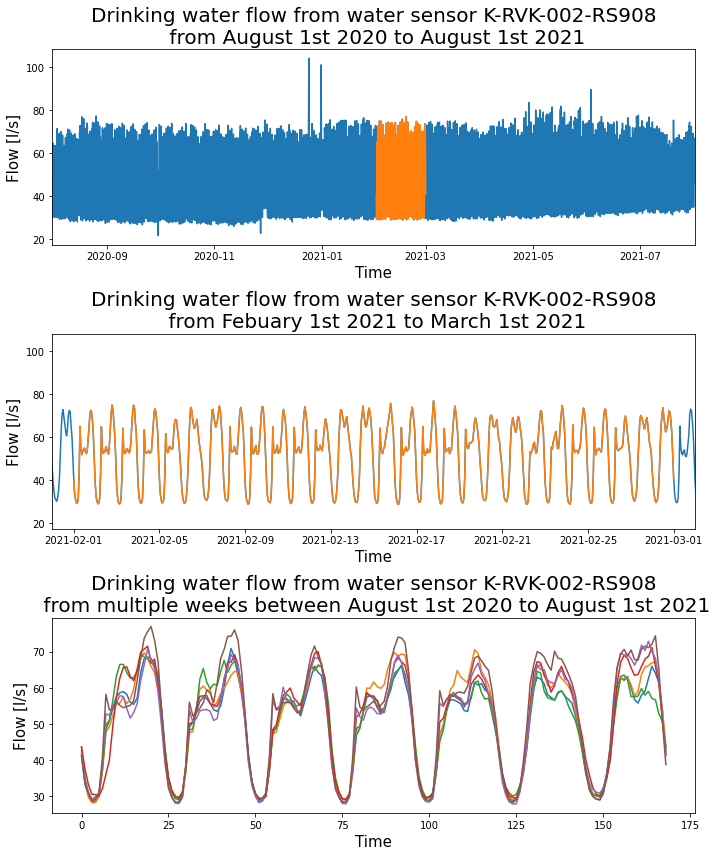

In [89]:
fig,axes = plt.subplots(3,1,figsize=(10,12))
p1s,p1e = datetime.datetime(2020,8,1),datetime.datetime(2021,8,1)
p2s,p2e = datetime.datetime(2021,2,1),datetime.datetime(2021,3,1)

p3sa,p3ea = datetime.datetime(2021,2,15),datetime.datetime(2021,2,22)
p3sb,p3eb = datetime.datetime(2021,3,15),datetime.datetime(2021,3,22)
p3sc,p3ec = datetime.datetime(2021,4,15),datetime.datetime(2021,4,22)


y = df_cold_wide.loc[:,'K-RVK-002-RS908'].dropna()

weekhour = y.index.weekday * 24 + y.index.hour
zero_hours = np.argwhere(weekhour==0).ravel()
index = y.index

axes[0].plot(y.loc[p1s:p1e])
axes[0].plot(y.loc[p2s:p2e])
axes[0].set_xlim(p1s,p1e)

axes[1].plot(y.loc[p1s:p1e])
axes[1].plot(y.loc[p2s:p2e])
axes[1].set_xlim(p2s-datetime.timedelta(days = 1),p2e+datetime.timedelta(days = 1))

axes[2].plot(y.loc[index[zero_hours[4]]:index[zero_hours[4]] + datetime.timedelta(days = 7)].values)
axes[2].plot(y.loc[index[zero_hours[5]]:index[zero_hours[5]] + datetime.timedelta(days = 7)].values)
axes[2].plot(y.loc[index[zero_hours[6]]:index[zero_hours[6]] + datetime.timedelta(days = 7)].values)
axes[2].plot(y.loc[index[zero_hours[7]]:index[zero_hours[7]] + datetime.timedelta(days = 7)].values)
axes[2].plot(y.loc[index[zero_hours[8]]:index[zero_hours[8]] + datetime.timedelta(days = 7)].values)
axes[2].plot(y.loc[index[zero_hours[9]]:index[zero_hours[9]] + datetime.timedelta(days = 7)].values)
# axes[2].legend()


title_size = 25
sub_title_size = 20
label_size = 15
# fig.suptitle(t='Drinking water flow from sensor K-RVK-002-RS908\', fontsize = title_size)
axes[0].set_xlabel('Time',fontsize = label_size)
axes[0].set_ylabel('Flow [l/s]',fontsize = label_size)
axes[0].set_title('Drinking water flow from water sensor K-RVK-002-RS908\n from August 1st 2020 to August 1st 2021',fontsize=sub_title_size)

axes[1].set_xlabel('Time',fontsize = label_size)
axes[1].set_ylabel('Flow [l/s]',fontsize = label_size)
axes[1].set_title('Drinking water flow from water sensor K-RVK-002-RS908\n from Febuary 1st 2021 to March 1st 2021',fontsize=sub_title_size)

axes[2].set_xlabel('Time',fontsize = label_size)
axes[2].set_ylabel('Flow [l/s]',fontsize = label_size)
axes[2].set_title('Drinking water flow from water sensor K-RVK-002-RS908\n from multiple weeks between August 1st 2020 to August 1st 2021',fontsize=sub_title_size)
plt.tight_layout(h_pad = 1)
plt.show()
# axes[2].set_xlim(p3s,p3e)


In [ ]:
for _,row in df_maelanofn.iterrows():
    old = row['old']
    new = row['new']
    old_start = row['old_start']
    old_end = row['old_end']
    if old in df_cold_wide:
        if new in df_cold_wide:
            df_cold_wide.loc[old_start:old_end, new] = df_cold_wide.loc[old_start:old_end, old]  
            df_cold_wide = df_cold_wide.drop(old,axis=1)

In [ ]:
import re
def replace_sensor(df, old_name, new_name):
    old_values = df.loc[:,old_name].dropna()
    old_dates = old_values.index
    df.loc[old_dates, new_name] = df.loc[old_dates, old_name]
    df = df.drop(old_name,axis=1)
    return df

def get_sensor_codes(sensor_name):
    if 'VRÁS' in sensor_name:
        building_ID = re.findall('K[0-9]*VRÁS',sensor_name)[0][1:-4]
        old = True
    if 'K-RVK' in sensor_name:
        building_ID = re.findall('K-RVK-[0-9]*-',sensor_name)[0][6:-1]
        old = False
        # print(sensor_name,key)
    sensor_key = re.findall('RS.*',sensor_name)[0][2:]
    return sensor_key,building_ID,old

In [ ]:
def replace_one_and_return(df):
    for sensor_name_1 in df.columns:
        sensor_key_1,building_ID_1,old_1 = get_sensor_codes(sensor_name_1)
        for sensor_name_2 in df.columns:
            if sensor_name_2 == sensor_name_1:
                continue
            sensor_key_2,building_ID_2,old_2 = get_sensor_codes(sensor_name_2)
            if sensor_key_1 == sensor_key_2:
                if building_ID_1 == building_ID_2:
                    print('Match found:',sensor_name_1, sensor_name_2)
                    if old_1:
                        df = replace_sensor(df,sensor_name_1,sensor_name_2)
                    if old_2:
                        df = replace_sensor(df,sensor_name_2,sensor_name_1)
                    return df,True
    print('All done')
    return df,False

still_left = True
while still_left:
    df_cold_wide,still_left = replace_one_and_return(df_cold_wide)

Match found: K-RVK-001-RS113 K001VRÁS-RS113
Match found: K-RVK-001-RS114 K001VRÁS-RS114
Match found: K-RVK-001-RS211 K001VRÁS-RS211
Match found: K-RVK-001-RS212 K001VRÁS-RS212
Match found: K-RVK-002-RS211 K002VRÁS-RS211
Match found: K-RVK-002-RS221 K002VRÁS-RS221
Match found: K-RVK-002-RS231 K002VRÁS-RS231
Match found: K-RVK-002-RS241 K002VRÁS-RS241
Match found: K-RVK-002-RS251 K002VRÁS-RS251
Match found: K-RVK-002-RS261 K002VRÁS-RS261
Match found: K-RVK-002-RS281 K002VRÁS-RS281
Match found: K-RVK-004-RS114 K004VRÁS-RS114
Match found: K-RVK-004-RS124 K004VRÁS-RS124
Match found: K-RVK-006-RS111 K006VRÁS-RS111
Match found: K-RVK-007-RS111 K007VRÁS-RS111
Match found: K-RVK-008-RS114 K008VRÁS-RS114
Match found: K-RVK-009-RS111 K009VRÁS-RS111
Match found: K-RVK-011-RS111 K011VRÁS-RS111
Match found: K-RVK-012-RS114 K012VRÁS-RS114
Match found: K-RVK-012-RS124 K012VRÁS-RS124
Match found: K-RVK-019-RS221 K019VRÁS-RS221
Match found: K-RVK-020-RS211 K020VRÁS-RS211
Match found: K-RVK-023-RS211 K02

In [ ]:
print(df_cold_wide.shape)

(60267, 92)


NameError: name 'df_cold_wide' is not defined

In [ ]:
df_results.loc[:,'K-RVK-002-RS908']

<AxesSubplot:>

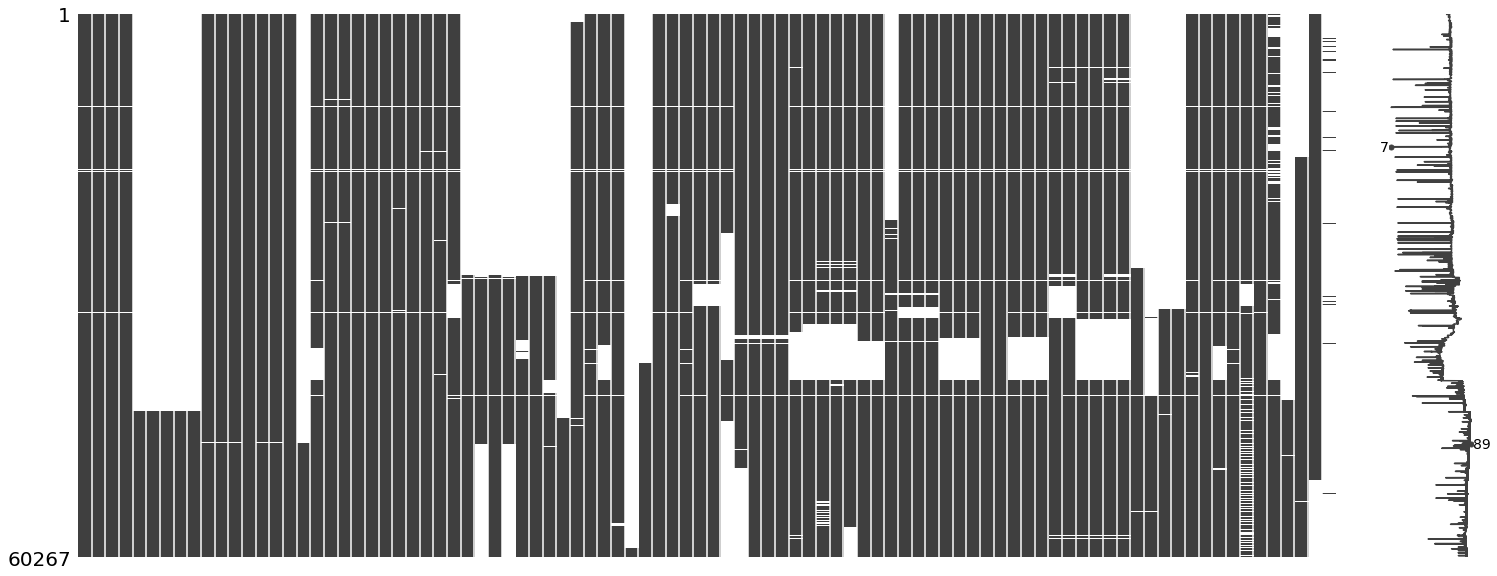

In [ ]:
from missingno import matrix
matrix(df_cold_wide)

In [ ]:
df_cold_wide.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60267 entries, 2015-01-01 00:00:00 to 2021-11-16 02:00:00
Data columns (total 92 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   K-RVK-001-RS113       59983 non-null  float64
 1   K-RVK-001-RS114       59979 non-null  float64
 2   K-RVK-001-RS211       59976 non-null  float64
 3   K-RVK-001-RS212       59936 non-null  float64
 4   K-RVK-001-RS5101      16095 non-null  float64
 5   K-RVK-001-RS5201      16095 non-null  float64
 6   K-RVK-001-RS5301      16094 non-null  float64
 7   K-RVK-001-RS5401      16117 non-null  float64
 8   K-RVK-001-RS5901      16118 non-null  float64
 9   K-RVK-002-RS211       60149 non-null  float64
 10  K-RVK-002-RS221       60124 non-null  float64
 11  K-RVK-002-RS231       60149 non-null  float64
 12  K-RVK-002-RS241       60226 non-null  float64
 13  K-RVK-002-RS251       60102 non-null  float64
 14  K-RVK-002-RS261       60131 non-nul

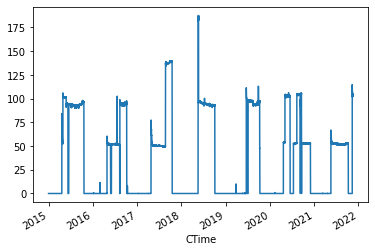

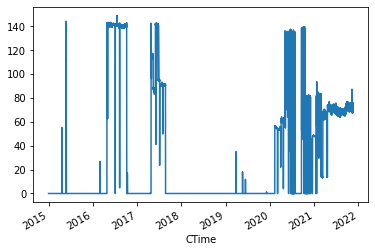

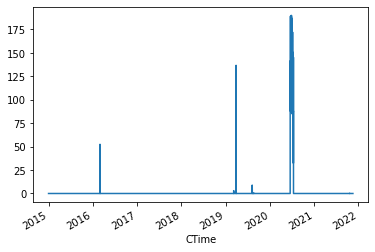

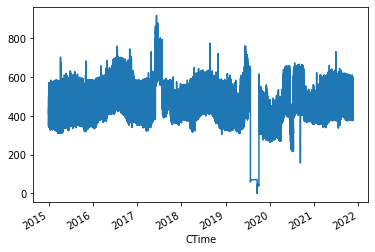

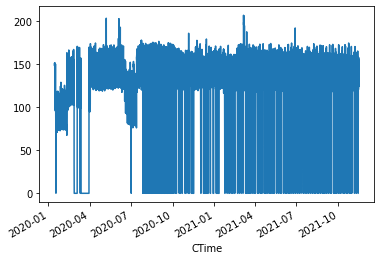

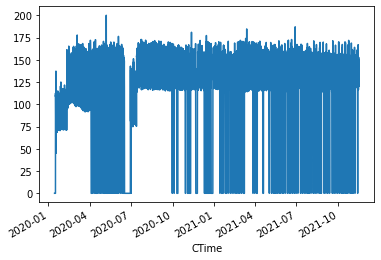

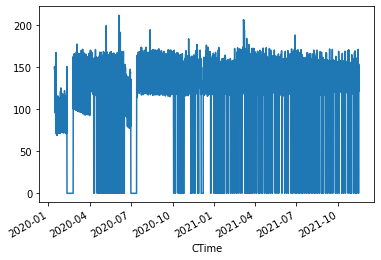

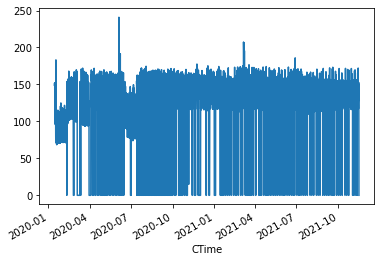

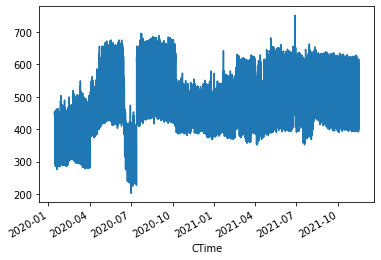

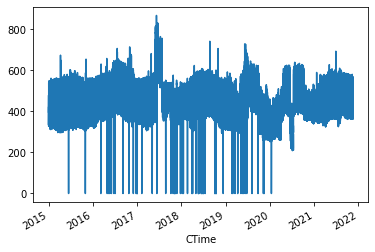

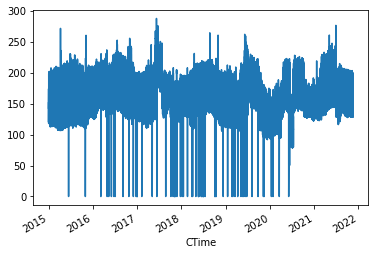

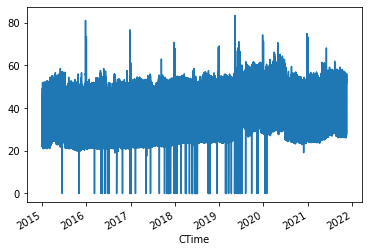

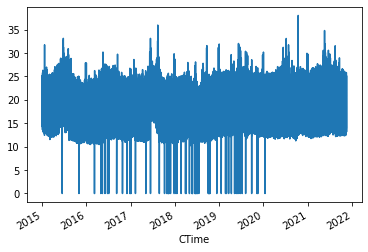

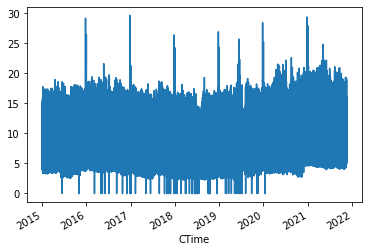

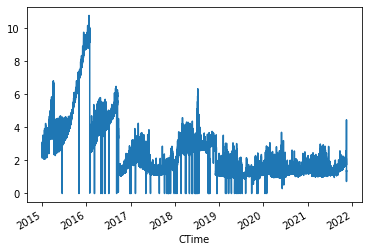

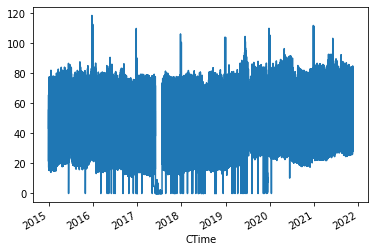

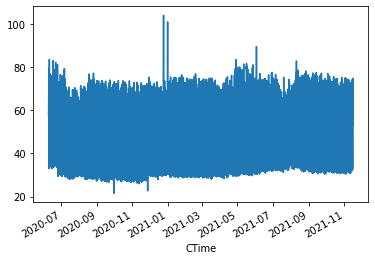

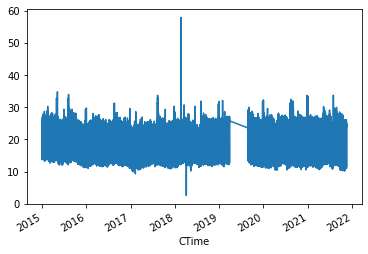

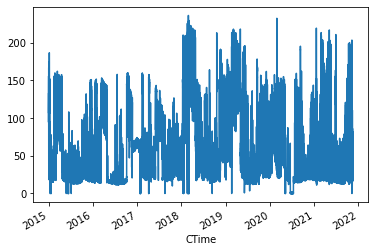

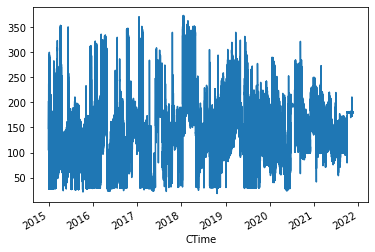

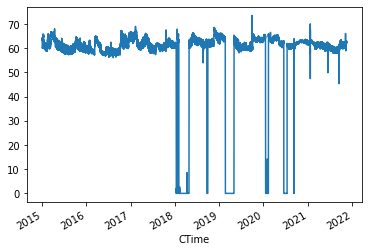

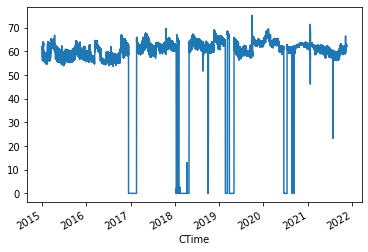

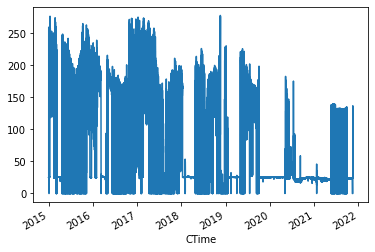

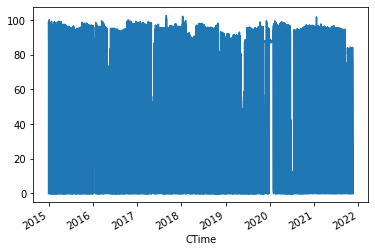

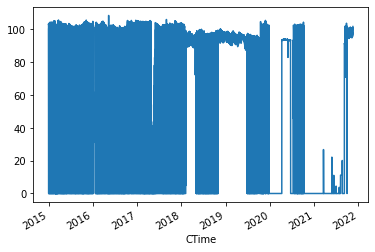

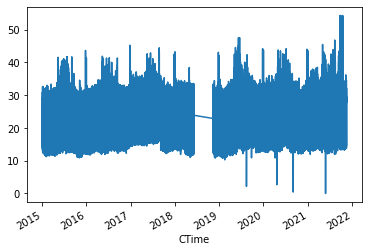

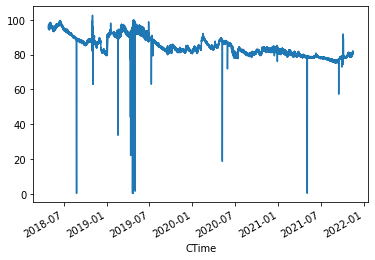

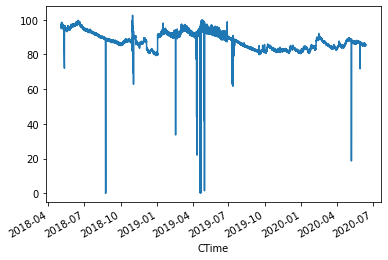

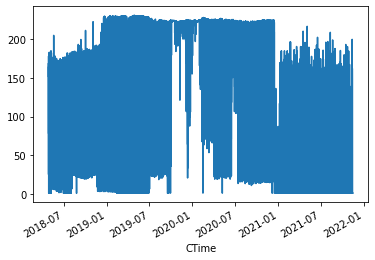

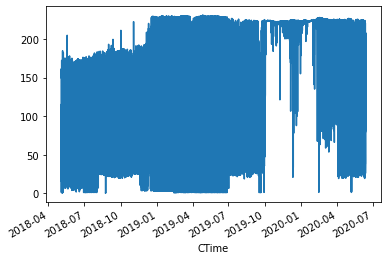

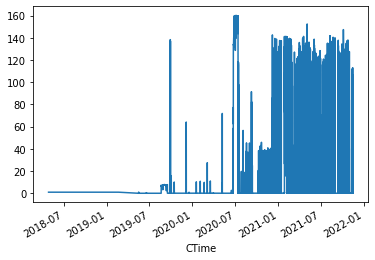

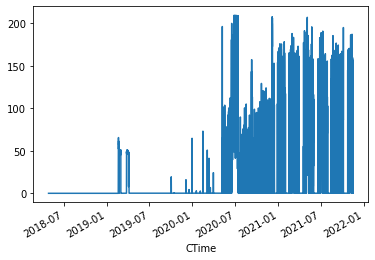

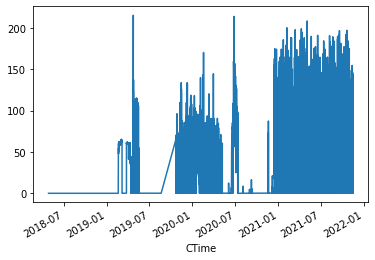

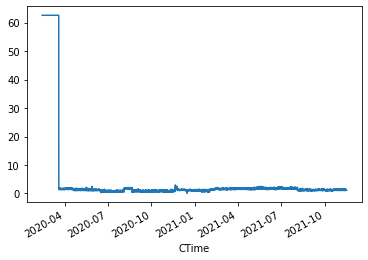

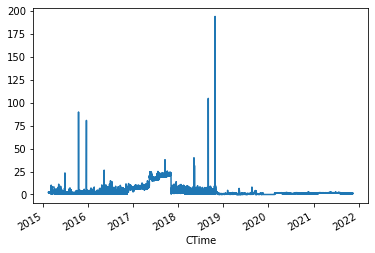

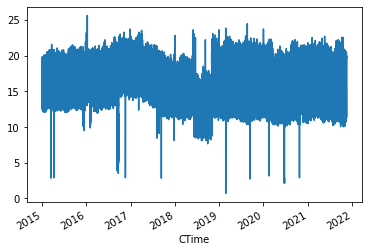

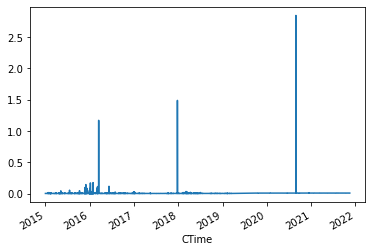

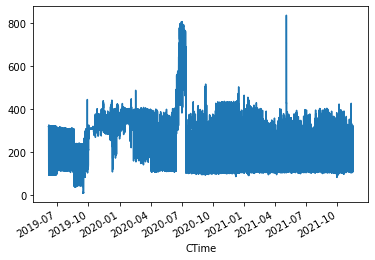

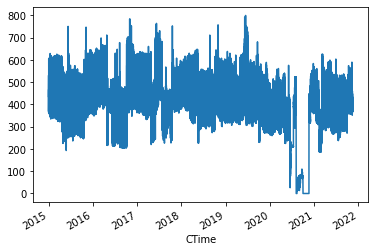

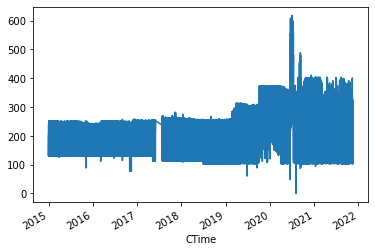

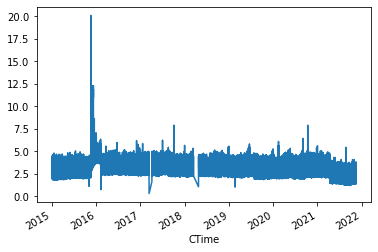

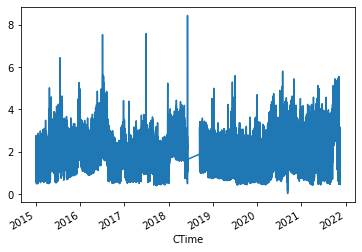

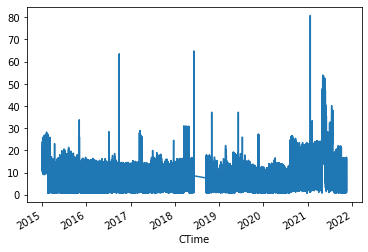

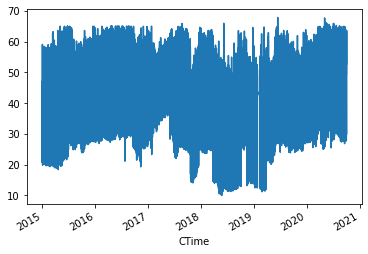

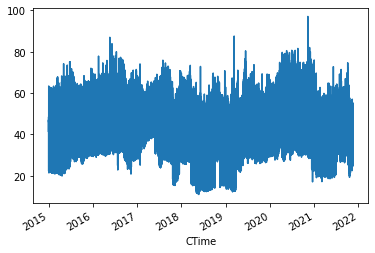

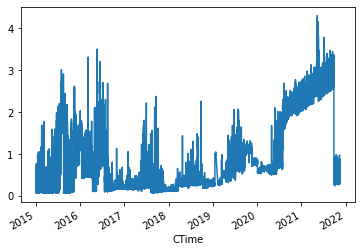

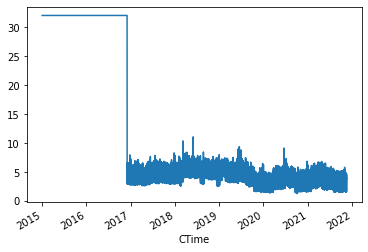

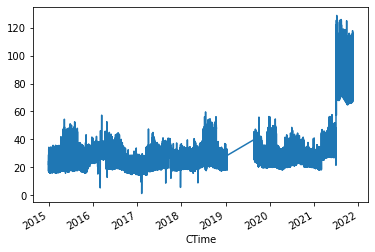

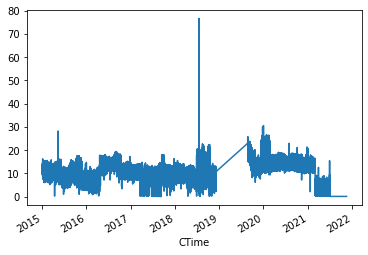

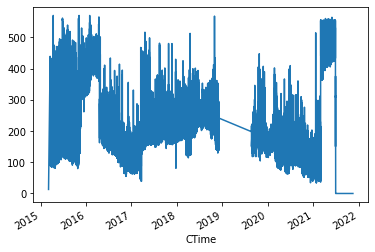

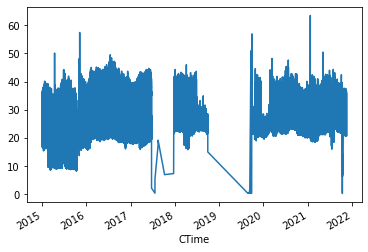

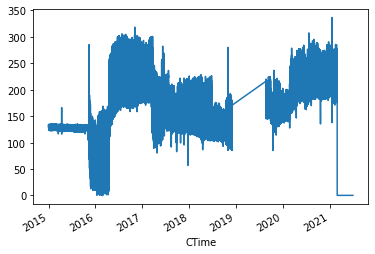

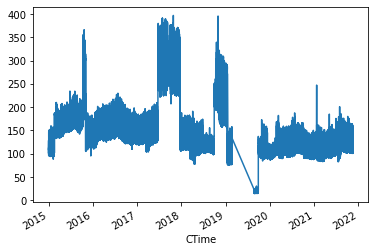

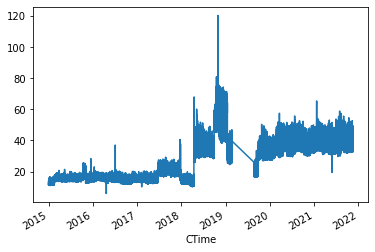

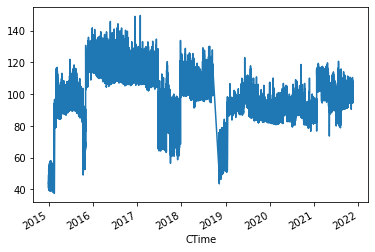

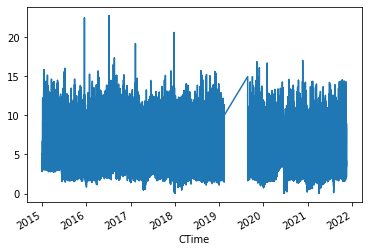

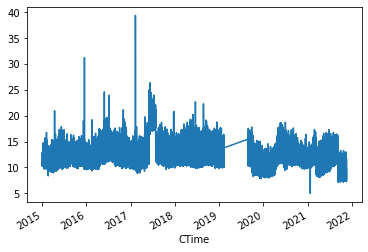

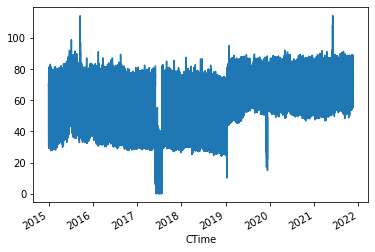

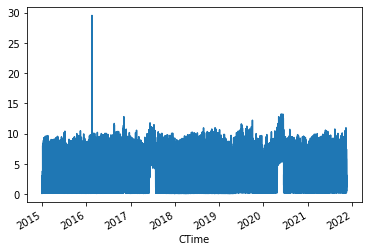

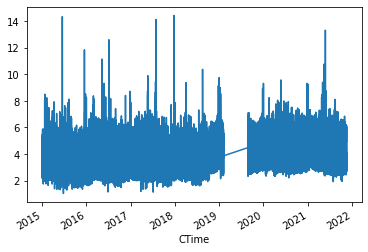

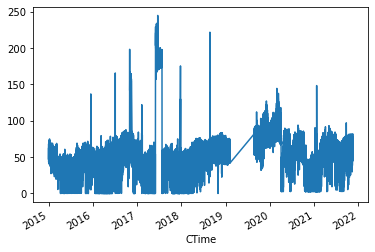

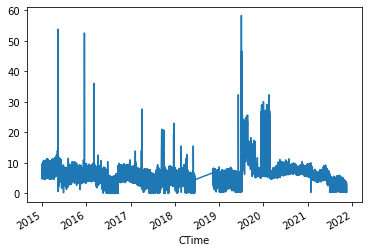

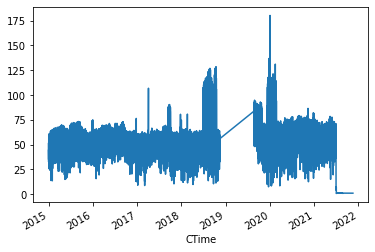

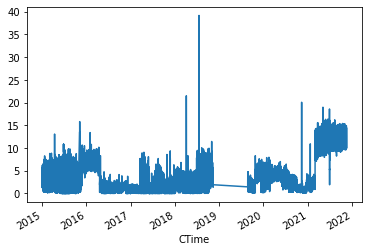

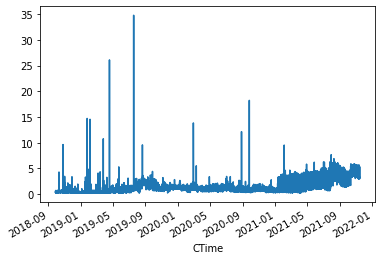

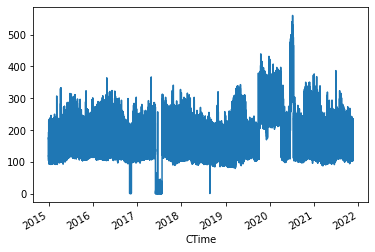

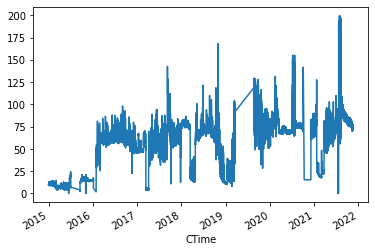

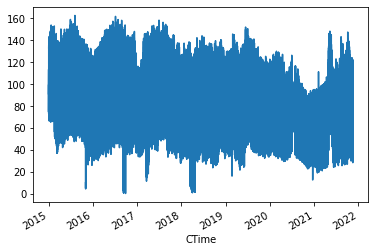

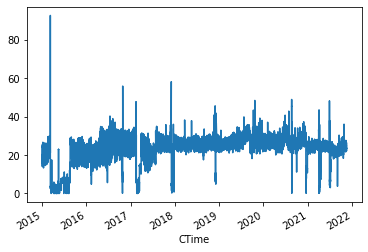

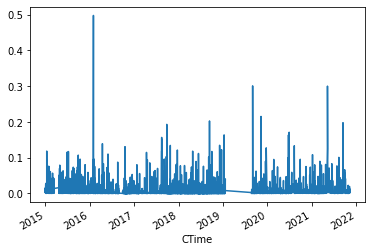

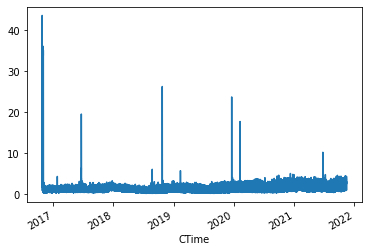

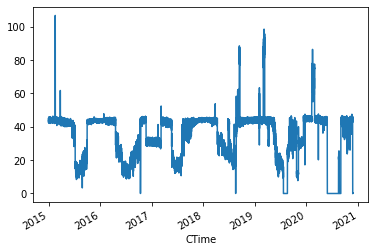

In [ ]:
# df_flaedi = pd.concat([df_cold_wide.loc[:,'K-RVK-036-RS211'],df_cold_wide.loc[:,'K036VRÁS-RS211']]).sort_index().dropna()
df_flaedi_list = []
# for sensor_name in ['K-RVK-002-RS211','K-RVK-002-RS221','K-RVK-002-RS231','K-RVK-002-RS241','K-RVK-002-RS251','K-RVK-002-RS261']:
for sensor_name in df_cold_wide.columns:
    df_flaedi = df_cold_wide.loc[:,sensor_name].sort_index()
    df_flaedi[df_flaedi < 0] = np.nan
    df_flaedi = df_flaedi.dropna()
    if len(df_flaedi) < 10_000:
        continue
    df_flaedi.plot()
    plt.show()
    df_flaedi_list.append(df_flaedi)

In [ ]:
df_flaedi.name

'K1VRÁS-RS02'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

sensor_results = []
for df_flaedi in df_flaedi_list:
    sensor_results_dict = {'name':df_flaedi.name}
    sensor_results_dict['mean'] = df_flaedi.mean()
    sensor_results_dict['n_values'] = len(df_flaedi)
    
    
    index = df_flaedi.index
    ohe = OneHotEncoder()
    ohe_ToD = ohe.fit_transform(index.hour.values.reshape(-1,1))
    ohe_WW = ohe.fit_transform(index.weekday.values.reshape(-1,1) >= 5)
    ohe_MoY = ohe.fit_transform(index.month.values.reshape(-1,1))
    ohe_ToD = ohe_ToD.toarray()
    ohe_WW = ohe_WW.toarray()
    ohe_MoY = ohe_MoY.toarray()

    n = len(df_flaedi)
    idx = np.arange(n)
    train = idx[:n//2]
    test = idx[n//2:]
    Y_train = df_flaedi.values[train]
    Y_test = df_flaedi.values[test]

    MSE_ohe_train = np.mean((Y_train-np.mean(Y_train))**2)
    MSE_ohe_test = np.mean((Y_test-np.mean(Y_train))**2)
    # print('train and test MSE with training mean: ',MSE_ohe_train,MSE_ohe_test)
    sensor_results_dict['MSE_ohe_train_mean'] = MSE_ohe_train
    sensor_results_dict['MSE_ohe_test_mean'] = MSE_ohe_test


    X_train = ohe_ToD[train]
    X_test = ohe_ToD[test]

    reg = Ridge()
    reg.fit(X_train,Y_train)
    Y_train_pred = reg.predict(X_train)
    Y_test_pred = reg.predict(X_test)

    MSE_ohe_train = np.mean((Y_train-Y_train_pred)**2)
    MSE_ohe_test = np.mean((Y_test-Y_test_pred)**2)
    sensor_results_dict['MSE_ohe_train_ToD'] = MSE_ohe_train
    sensor_results_dict['MSE_ohe_test_ToD'] = MSE_ohe_test
    # print('train and test MSE with ToD: ',MSE_ohe_train,MSE_ohe_test)
    
    
    corr_ohe_train = np.corrcoef(Y_train,Y_train_pred)[0,1]
    corr_ohe_test = np.corrcoef(Y_test,Y_test_pred)[0,1]
    sensor_results_dict['corr_ohe_train_ToD'] = corr_ohe_train
    sensor_results_dict['corr_ohe_test_ToD'] = corr_ohe_test
    
    r2_ohe_train = r2_score(Y_train,Y_train_pred)
    r2_ohe_test = r2_score(Y_test,Y_test_pred)
    sensor_results_dict['r2_ohe_train_ToD'] = r2_ohe_train
    sensor_results_dict['r2_ohe_test_ToD'] = r2_ohe_test
    # print('train and test r2elation: ',r2_ohe_train,r2_ohe_test)


    train = idx[:n//2]
    test = idx[n//2:]
    OHE_ToD_WW = np.c_[ohe_ToD,ohe_WW]

    X_train = OHE_ToD_WW[train]
    X_test = OHE_ToD_WW[test]


    reg = Ridge()
    reg.fit(X_train,Y_train)
    Y_train_pred = reg.predict(X_train)
    Y_test_pred = reg.predict(X_test)

    MSE_ohe_train = np.mean((Y_train-Y_train_pred)**2)
    MSE_ohe_test = np.mean((Y_test-Y_test_pred)**2)
    sensor_results_dict['MSE_ohe_train_ToD_WW'] = MSE_ohe_train
    sensor_results_dict['MSE_ohe_test_ToD_WW'] = MSE_ohe_test
    # print('train and test MSE with ToD and WW: ',MSE_ohe_train,MSE_ohe_test)
    
    corr_ohe_train = np.corrcoef(Y_train,Y_train_pred)[0,1]
    corr_ohe_test = np.corrcoef(Y_test,Y_test_pred)[0,1]
    sensor_results_dict['corr_ohe_train_ToD_WW'] = corr_ohe_train
    sensor_results_dict['corr_ohe_test_ToD_WW'] = corr_ohe_test
    
    r2_ohe_train = r2_score(Y_train,Y_train_pred)
    r2_ohe_test = r2_score(Y_test,Y_test_pred)
    sensor_results_dict['r2_ohe_train_ToD_WW'] = r2_ohe_train
    sensor_results_dict['r2_ohe_test_ToD_WW'] = r2_ohe_test
    # print('train and test correlation: ',corr_ohe_train,corr_ohe_test)


    train = idx[:n//2]
    test = idx[n//2:]
    OHE_ToD_WW_MoY = np.c_[ohe_ToD,ohe_WW,ohe_MoY]

    X_train = OHE_ToD_WW_MoY[train]
    X_test = OHE_ToD_WW_MoY[test]


    reg = Ridge()
    reg.fit(X_train,Y_train)
    Y_train_pred = reg.predict(X_train)
    Y_test_pred = reg.predict(X_test)

    MSE_ohe_train = np.mean((Y_train-Y_train_pred)**2)
    MSE_ohe_test = np.mean((Y_test-Y_test_pred)**2)
    sensor_results_dict['MSE_ohe_train_ToD_WW_MoY'] = MSE_ohe_train
    sensor_results_dict['MSE_ohe_test_ToD_WW_MoY'] = MSE_ohe_test
    # print('train and test MSE with ToD and WW and MoY: ',MSE_ohe_train,MSE_ohe_test)
    
    
    corr_ohe_train = np.corrcoef(Y_train,Y_train_pred)[0,1]
    corr_ohe_test = np.corrcoef(Y_test,Y_test_pred)[0,1]
    sensor_results_dict['corr_ohe_train_ToD_WW_MoY'] = corr_ohe_train
    sensor_results_dict['corr_ohe_test_ToD_WW_MoY'] = corr_ohe_test
    
    r2_ohe_train = r2_score(Y_train,Y_train_pred)
    r2_ohe_test = r2_score(Y_test,Y_test_pred)
    sensor_results_dict['r2_ohe_train_ToD_WW_MoY'] = r2_ohe_train
    sensor_results_dict['r2_ohe_test_ToD_WW_MoY'] = r2_ohe_test
    # print('train and test correlation: ',corr_ohe_train,corr_ohe_test)
    
    
    
    train = idx[:n//2]
    test = idx[n//2:]
    OHE_ToD_WW_MoY = np.c_[ohe_ToD,ohe_WW,ohe_MoY]

    X_train = OHE_ToD_WW_MoY[train]
    X_test = OHE_ToD_WW_MoY[test]


    reg = Ridge()
    reg.fit(X_train,Y_train)
    Y_train_pred = reg.predict(X_train)
    Y_test_pred = reg.predict(X_test)

    MSE_ohe_train = np.mean((Y_train-Y_train_pred)**2)
    MSE_ohe_test = np.mean((Y_test-Y_test_pred)**2)
    sensor_results_dict['MSE_ohe_train_ToD_WW_MoY'] = MSE_ohe_train
    sensor_results_dict['MSE_ohe_test_ToD_WW_MoY'] = MSE_ohe_test
    # print('train and test MSE with ToD and WW and MoY: ',MSE_ohe_train,MSE_ohe_test)
    
    
    corr_ohe_train = np.corrcoef(Y_train,Y_train_pred)[0,1]
    corr_ohe_test = np.corrcoef(Y_test,Y_test_pred)[0,1]
    sensor_results_dict['corr_ohe_train_ToD_WW_MoY'] = corr_ohe_train
    sensor_results_dict['corr_ohe_test_ToD_WW_MoY'] = corr_ohe_test
    
    r2_ohe_train = r2_score(Y_train,Y_train_pred)
    r2_ohe_test = r2_score(Y_test,Y_test_pred)
    sensor_results_dict['r2_ohe_train_ToD_WW_MoY'] = r2_ohe_train
    sensor_results_dict['r2_ohe_test_ToD_WW_MoY'] = r2_ohe_test
    # print('train and test correlation: ',corr_ohe_train,corr_ohe_test)
    
    
    temp_corr = df_H.loc[:,1475].dropna().corr(df_flaedi)
    sensor_results_dict['Temp_corr'] = temp_corr
    
    sensor_results.append(sensor_results_dict)

In [ ]:
df_results = pd.DataFrame(sensor_results)


In [ ]:
# df_results

In [ ]:
df_results.loc[df_results.isna().any(axis=1)]

Empty DataFrame
Columns: []
Index: []

In [ ]:
plt.plot(df_results.sort_values('r2_ohe_test_ToD').r2_ohe_test_ToD.values, label = 'Sorted correlation with Time of Day')
# plt.plot(df_results.sort_values('Temp_corr').Temp_corr.values, label = 'Sorted correlation wtih Temperature')
plt.grid(which='major',axis='y')
plt.legend()
plt.ylim(0,1)
plt.show()

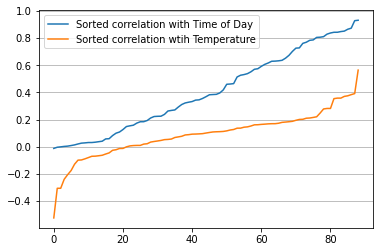

In [ ]:
plt.plot(df_results.sort_values('corr_ohe_test_ToD').corr_ohe_test_ToD.values, label = 'Sorted correlation with Time of Day')
plt.plot(df_results.sort_values('Temp_corr').Temp_corr.values, label = 'Sorted correlation wtih Temperature')
plt.grid(which='major',axis='y')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Histogram of correlation between cold water sensor\nvalues and the time of day in OHE represenstation')

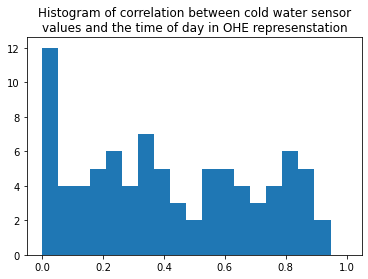

In [ ]:
plt.hist(df_results.sort_values('corr_ohe_test_ToD').corr_ohe_test_ToD,bins=np.linspace(0,1,20))
plt.title('Histogram of correlation between cold water sensor\nvalues and the time of day in OHE represenstation')

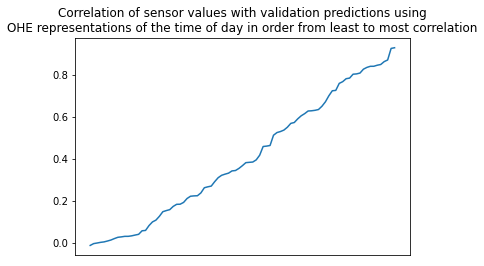

In [ ]:
plt.plot(df_results.sort_values('corr_ohe_test_ToD').corr_ohe_test_ToD.values, label = 'ToD')
# plt.plot(df_results.sort_values('corr_ohe_test_ToD_DoW').corr_ohe_test_ToD_DoW.values, label = 'ToD_DoW')
# plt.plot(df_results.sort_values('corr_ohe_test_ToD_DoW_MoY').corr_ohe_test_ToD_DoW_MoY.values, label = 'ToD_DoW_MoY')
plt.title('Correlation of sensor values with validation predictions using\nOHE representations of the time of day in order from least to most correlation')
plt.xticks([],[])

# plt.legend()
plt.show()


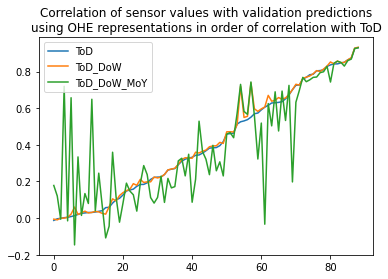

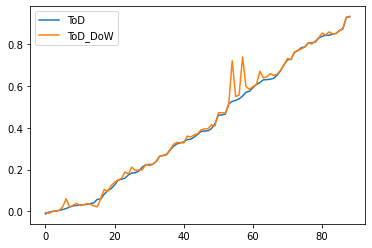

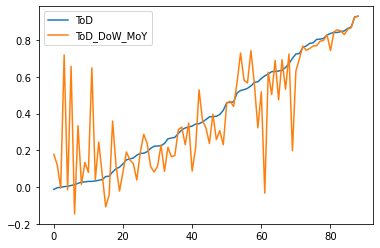

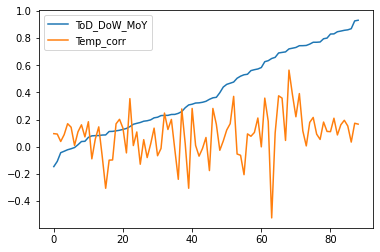

In [ ]:
plt.plot(df_results.sort_values('corr_ohe_test_ToD').corr_ohe_test_ToD.values, label = 'ToD')
plt.plot(df_results.sort_values('corr_ohe_test_ToD').corr_ohe_test_ToD_DoW.values, label = 'ToD_DoW')
plt.plot(df_results.sort_values('corr_ohe_test_ToD').corr_ohe_test_ToD_DoW_MoY.values, label = 'ToD_DoW_MoY')
plt.title('Correlation of sensor values with validation predictions\nusing OHE representations in order of correlation with ToD')
plt.legend()
plt.show()


plt.plot(df_results.sort_values('corr_ohe_test_ToD').corr_ohe_test_ToD.values, label = 'ToD')
plt.plot(df_results.sort_values('corr_ohe_test_ToD').corr_ohe_test_ToD_DoW.values, label = 'ToD_DoW')
plt.legend()
plt.show()
plt.plot(df_results.sort_values('corr_ohe_test_ToD').corr_ohe_test_ToD.values, label = 'ToD')
plt.plot(df_results.sort_values('corr_ohe_test_ToD').corr_ohe_test_ToD_DoW_MoY.values, label = 'ToD_DoW_MoY')
plt.legend()
plt.show()

plt.plot(df_results.sort_values('corr_ohe_test_ToD').corr_ohe_test_ToD.values, label = 'ToD')
plt.plot(df_results.sort_values('corr_ohe_test_ToD').Temp_corr.values, label = 'ToD_DoW_MoY')
plt.legend()
plt.show()

plt.plot(df_results.sort_values('corr_ohe_test_ToD_DoW_MoY').corr_ohe_test_ToD_DoW_MoY.values, label = 'ToD_DoW_MoY')
plt.plot(df_results.sort_values('corr_ohe_test_ToD_DoW_MoY').Temp_corr.values, label = 'Temp_corr')
plt.legend()
plt.show()

In [ ]:
# df_results.sort_values('corr_ohe_test_ToD').loc[:,'corr_ohe_test_ToD'].values

TypeError: _average_dispatcher() missing 1 required positional argument: 'a'

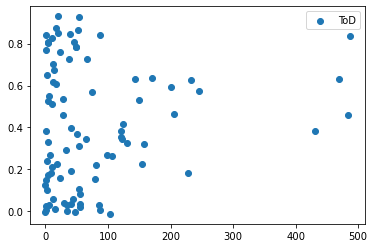

In [ ]:
plt.scatter(df_results.sort_values('corr_ohe_test_ToD').loc[:,'mean'].values,df_results.sort_values('corr_ohe_test_ToD').loc[:,'corr_ohe_test_ToD'].values, label = 'ToD')
# plt.plot(df_results.sort_values('corr_ohe_test_ToD').loc[:,'mean'].sort_values().values, label = 'ToD_DoW')
# plt.plot(df_results.sort_values('corr_ohe_test_ToD').loc[:,'mean'].sort_values().values, label = 'ToD_DoW_MoY')
plt.legend()
plt.show()

In [ ]:
np.average(df_results.sort_values('corr_ohe_test_ToD').loc[:,'corr_ohe_test_ToD'].values,weights = df_results.sort_values('corr_ohe_test_ToD').loc[:,'mean'].values)

0.4554646274871785

NameError: name 'df_results' is not defined

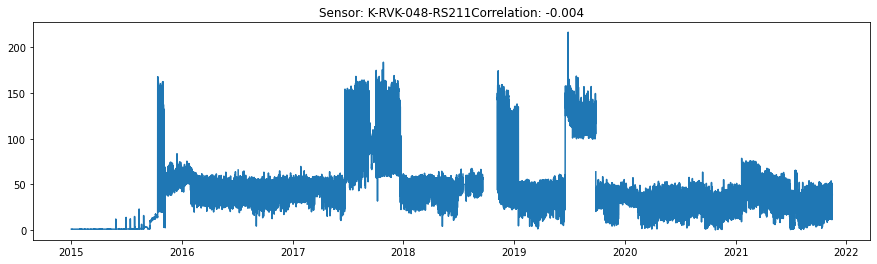

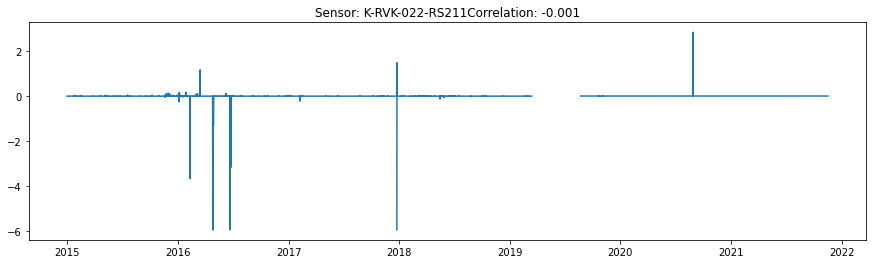

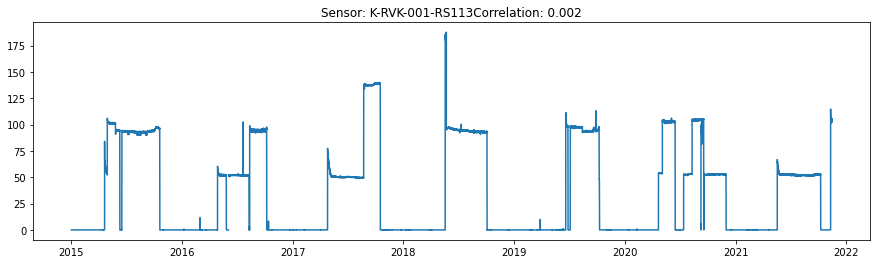

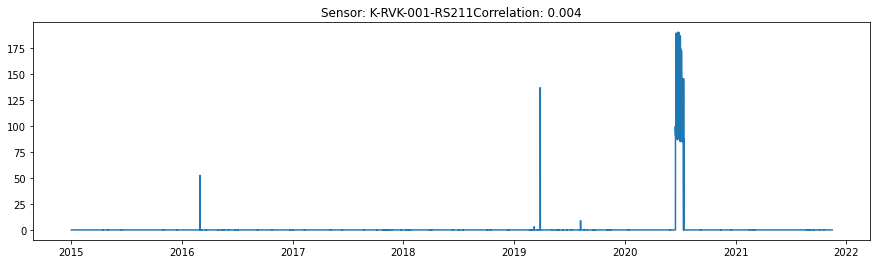

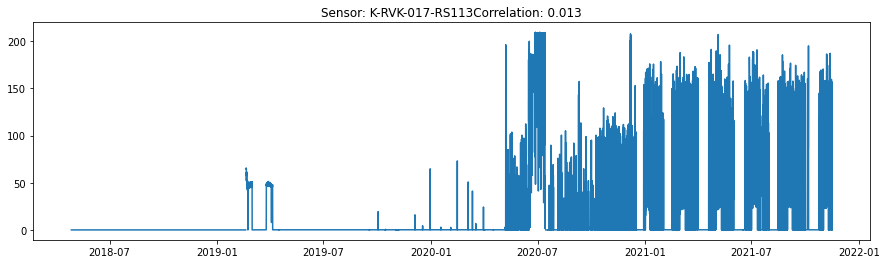

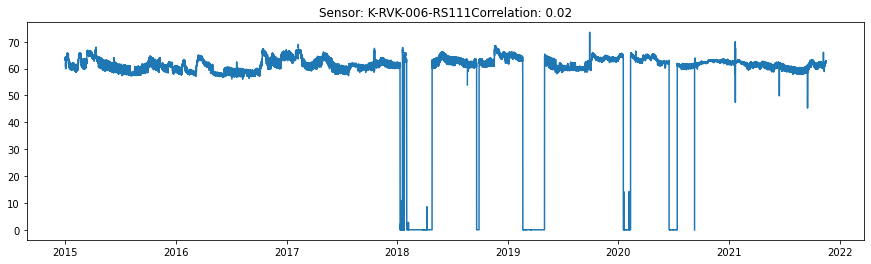

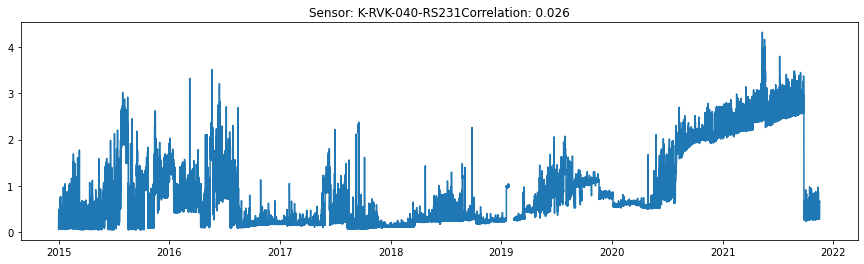

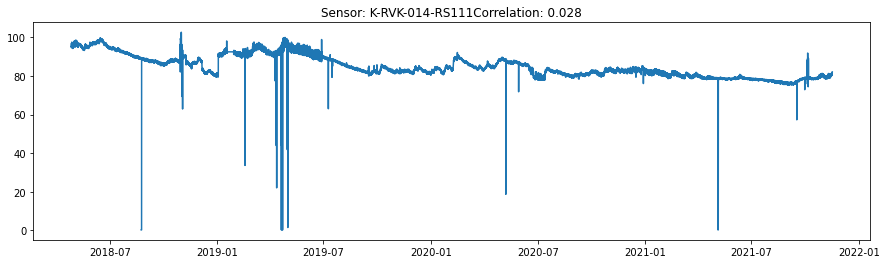

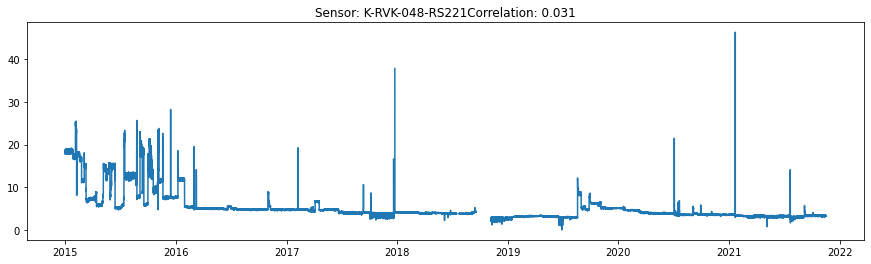

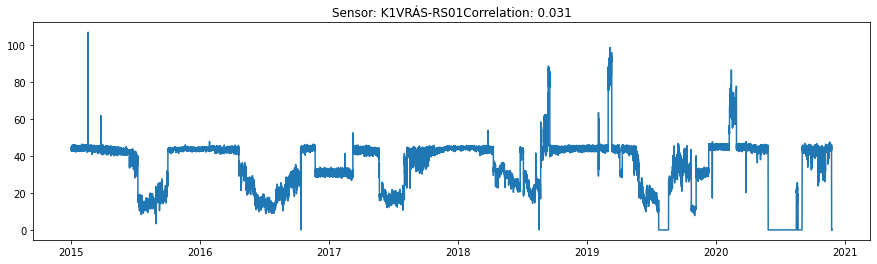

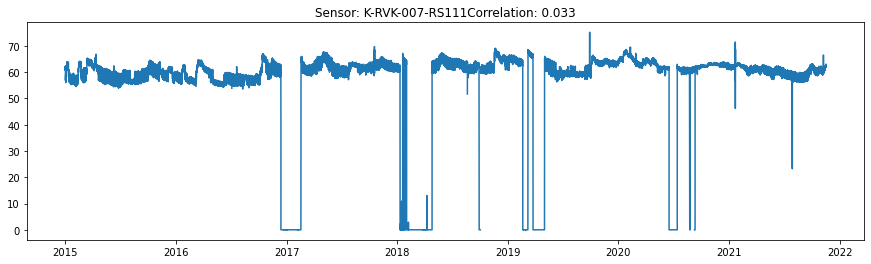

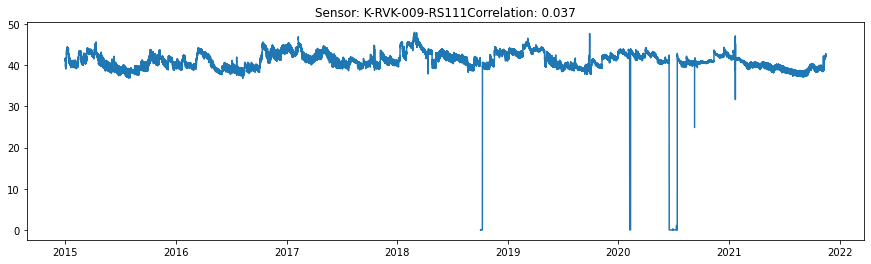

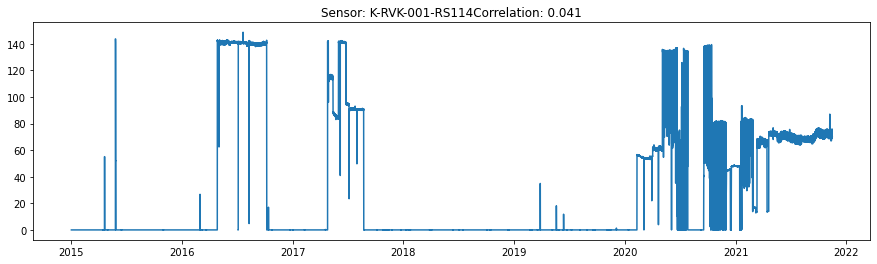

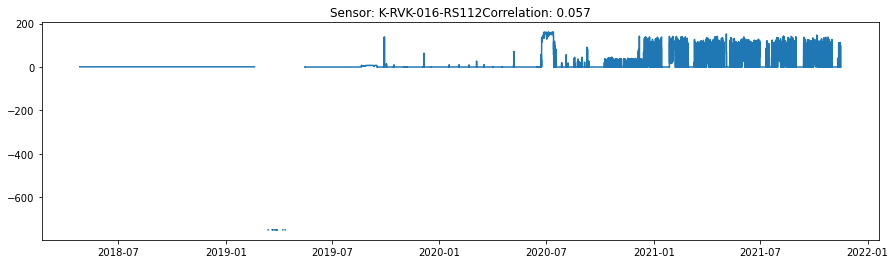

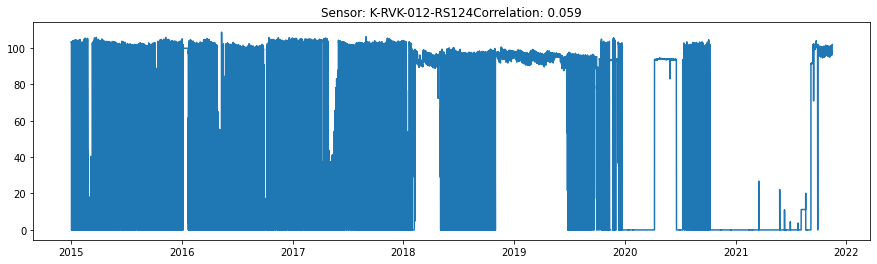

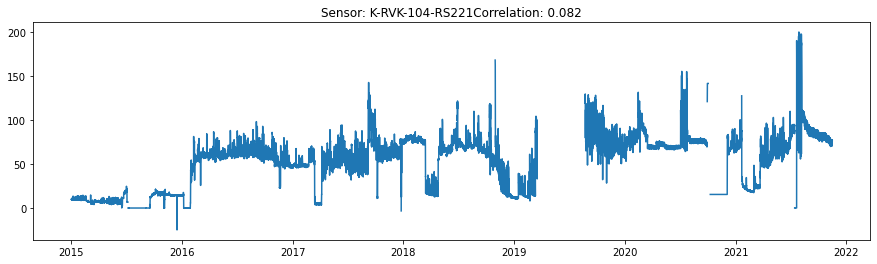

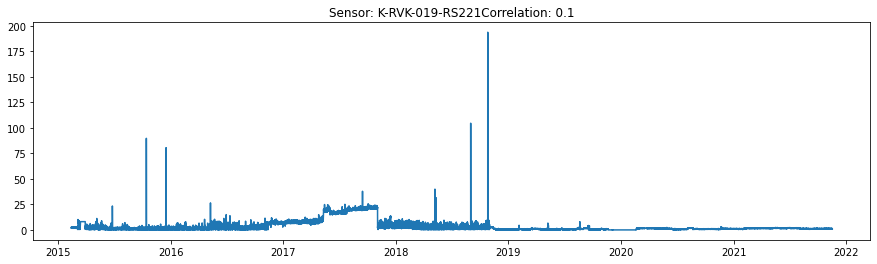

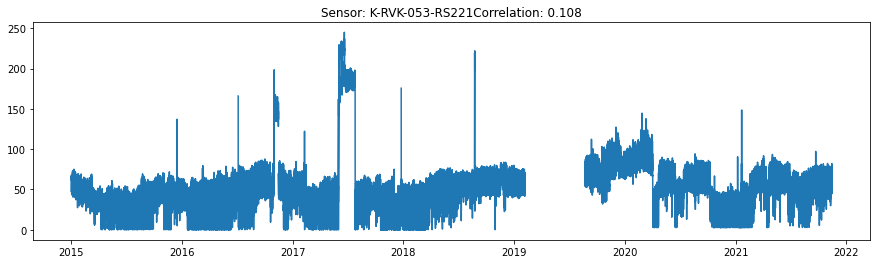

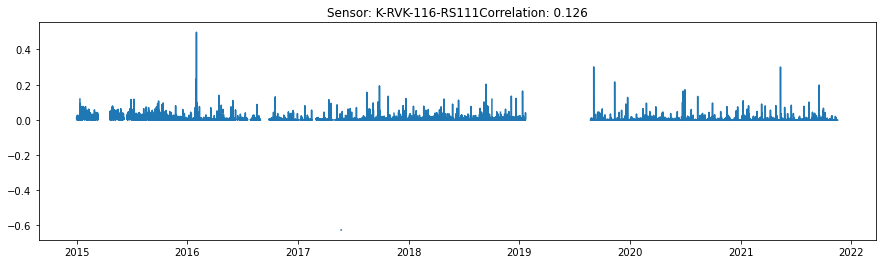

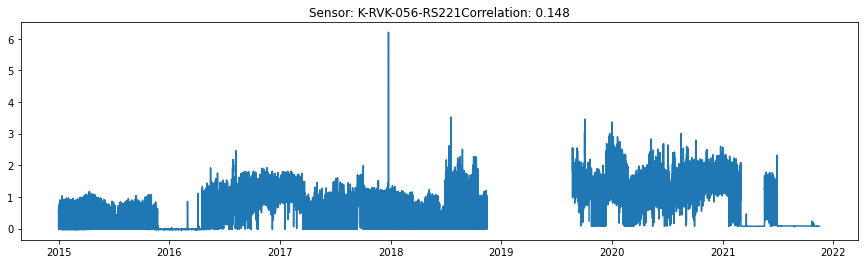

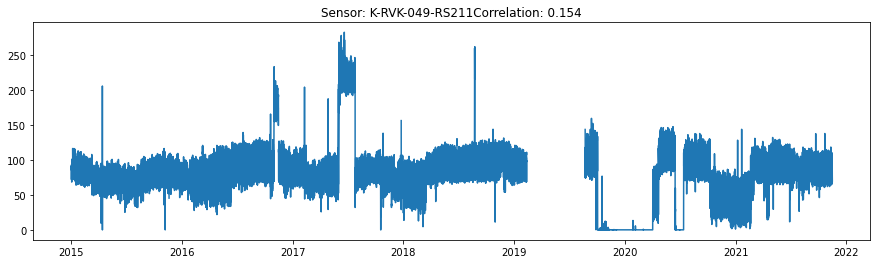

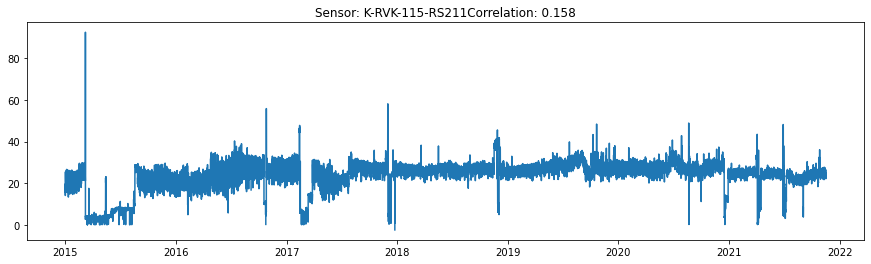

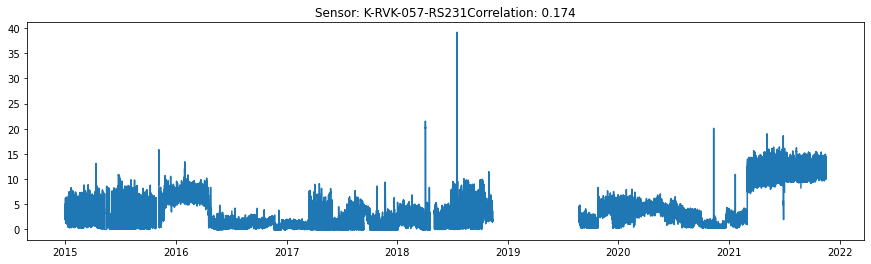

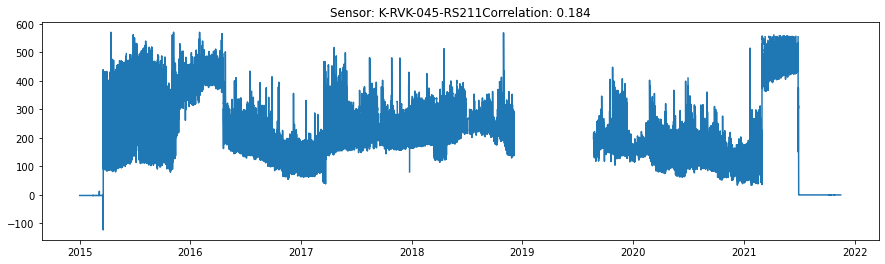

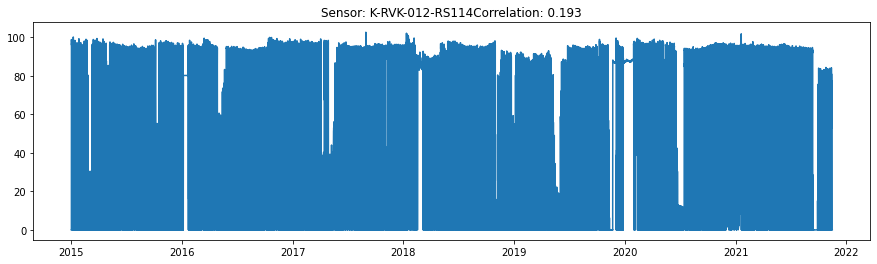

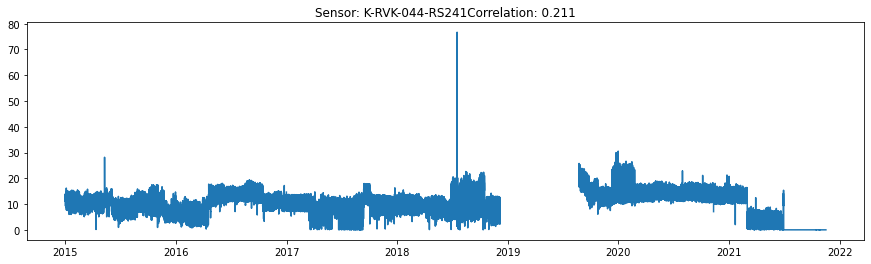

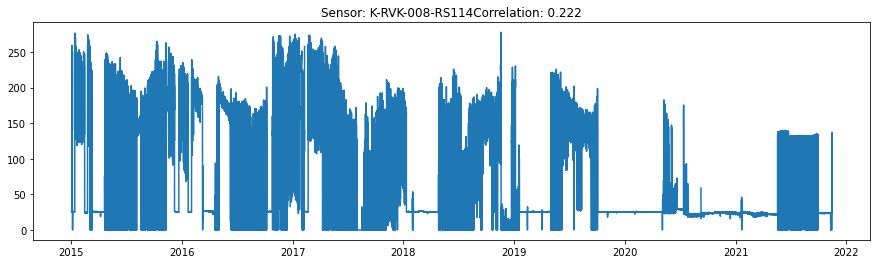

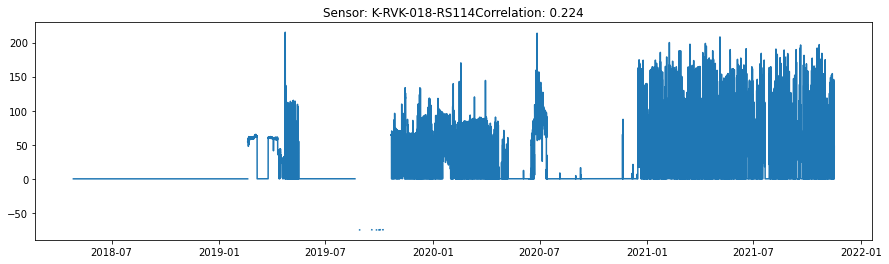

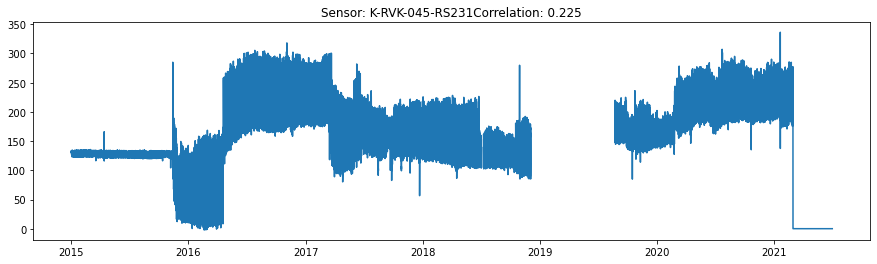

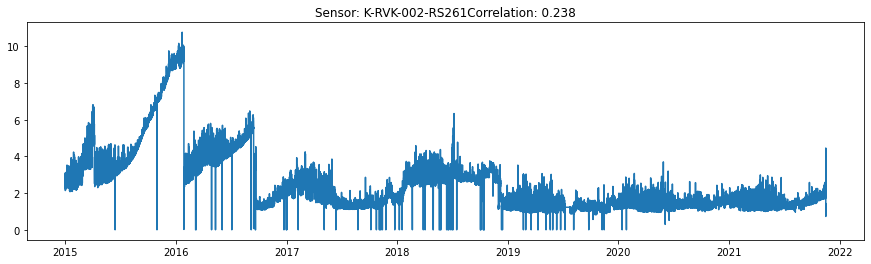

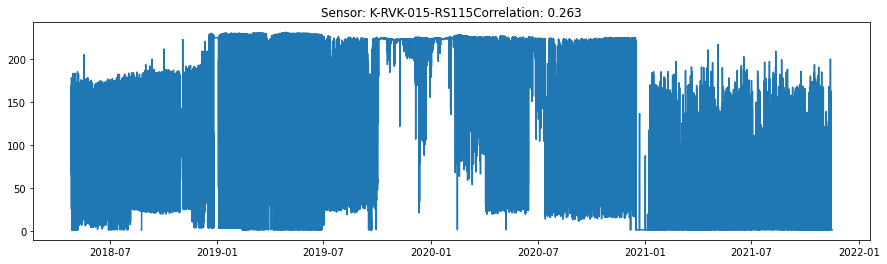

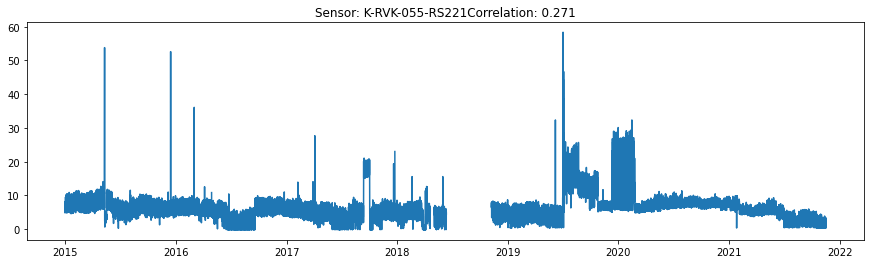

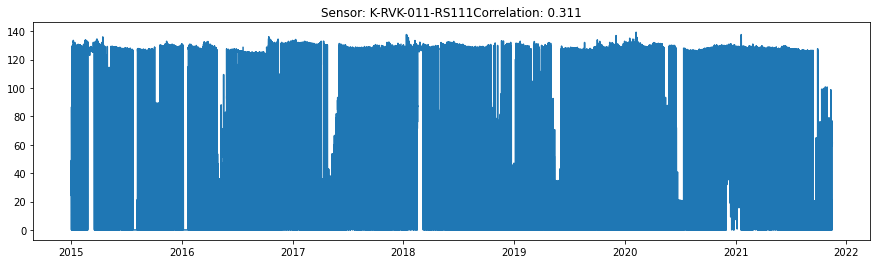

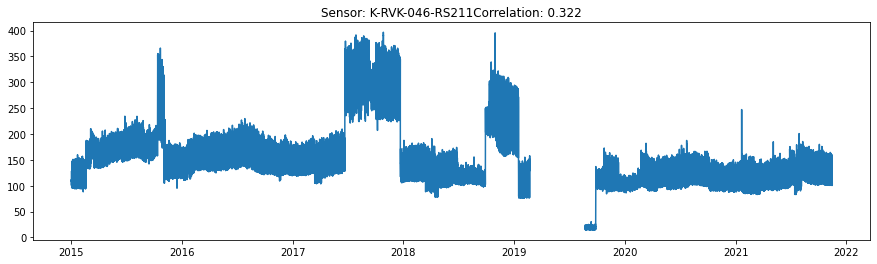

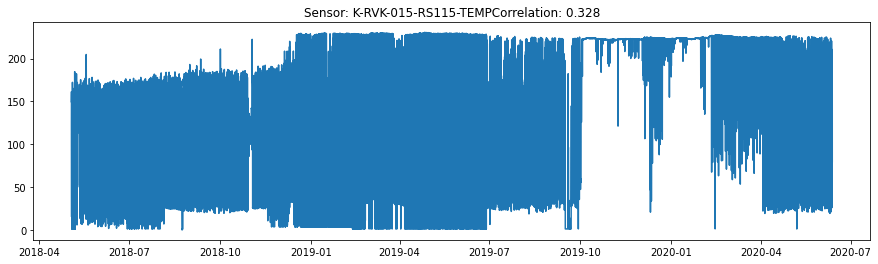

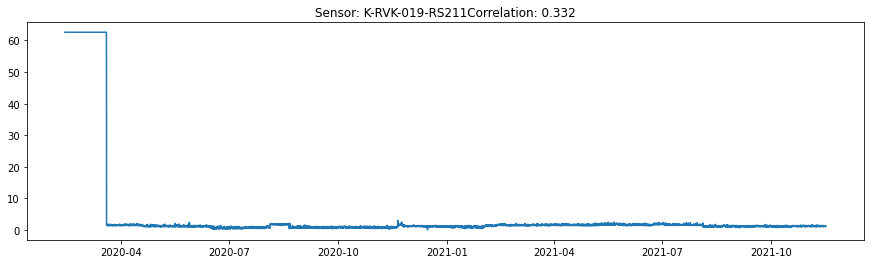

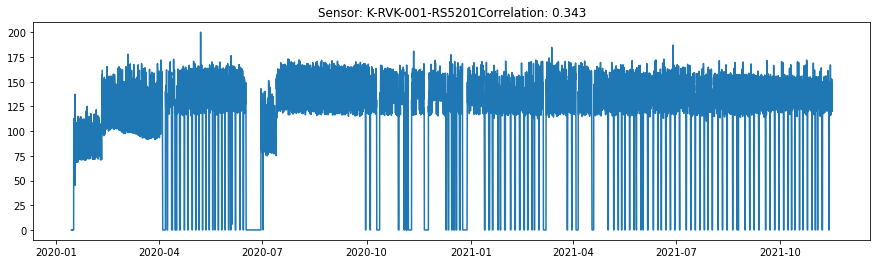

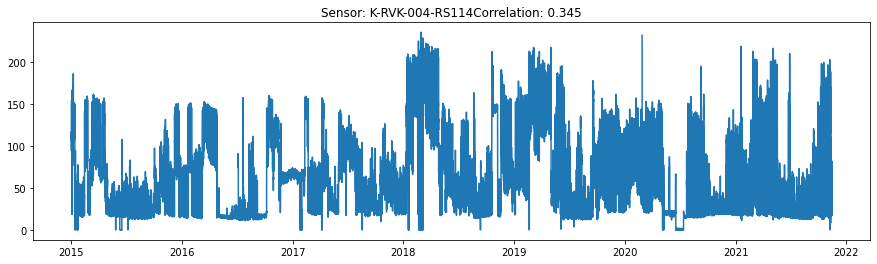

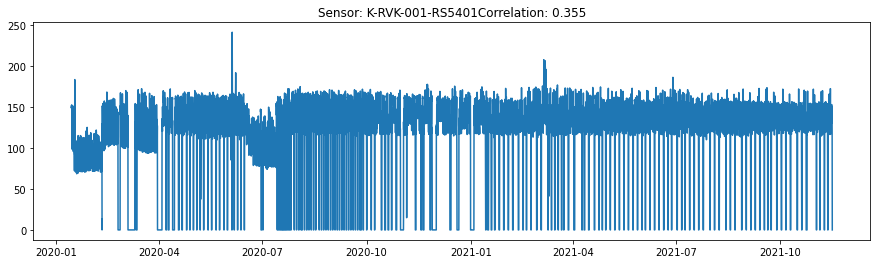

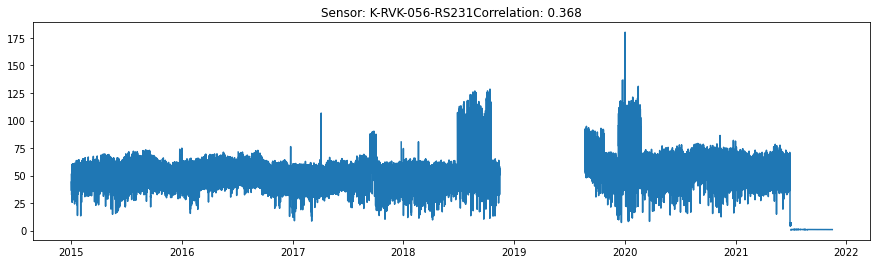

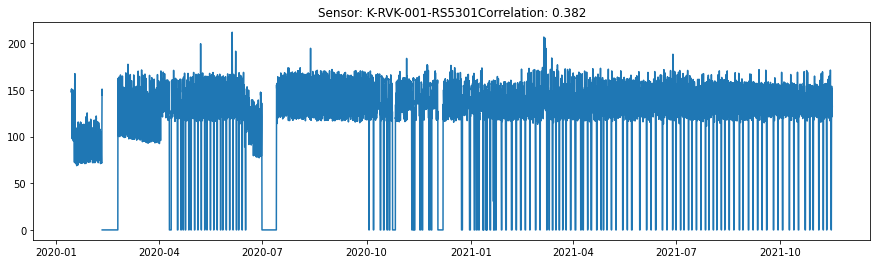

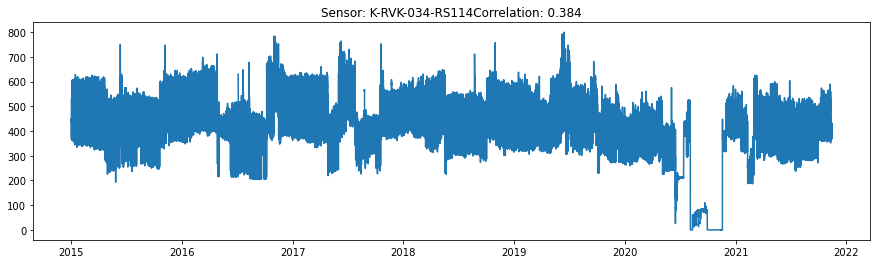

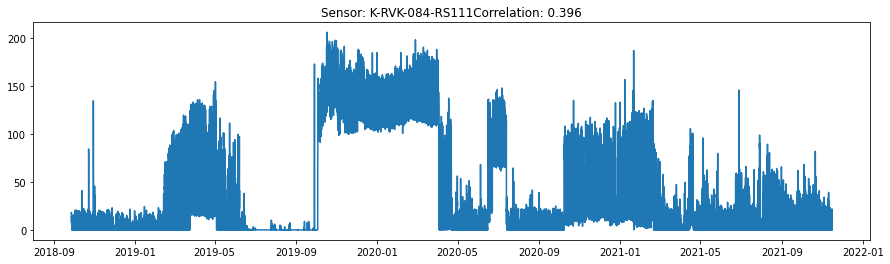

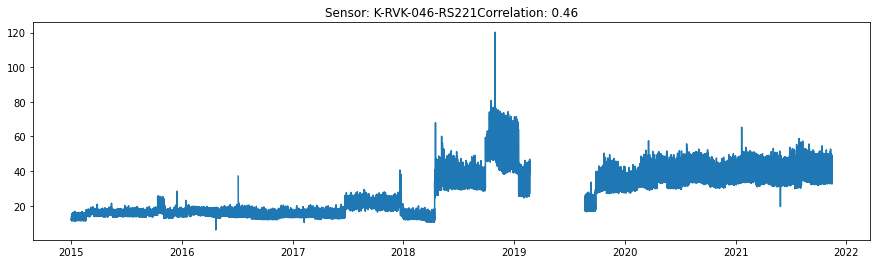

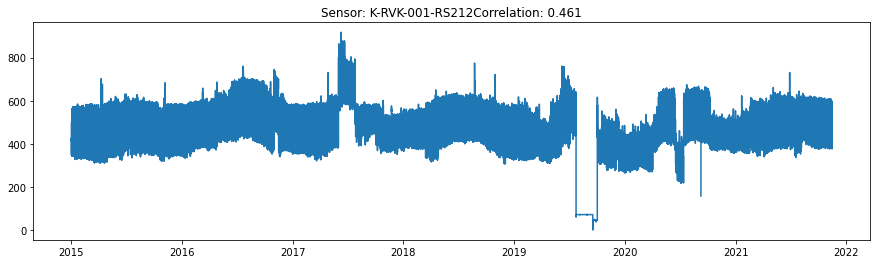

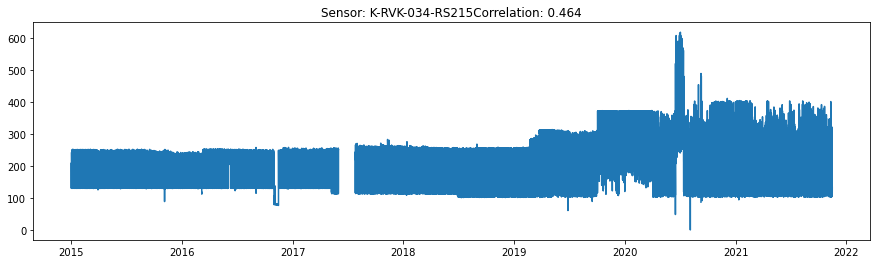

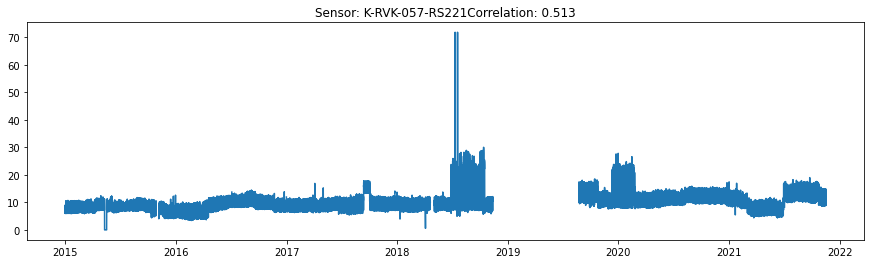

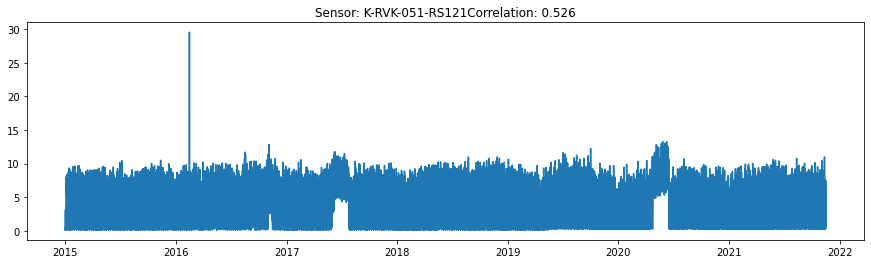

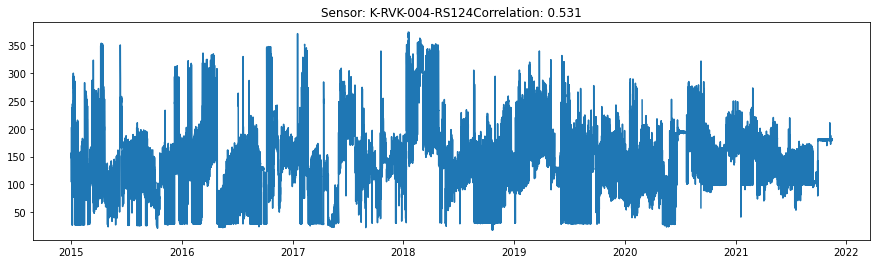

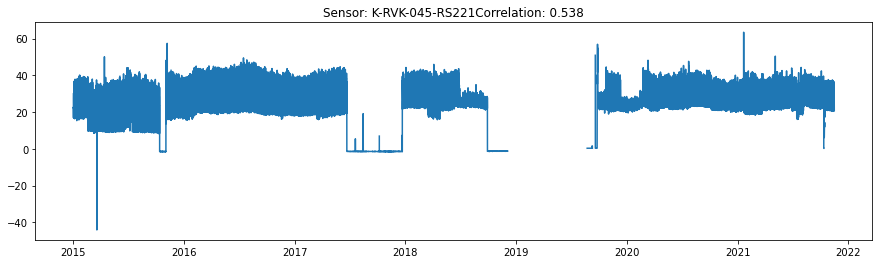

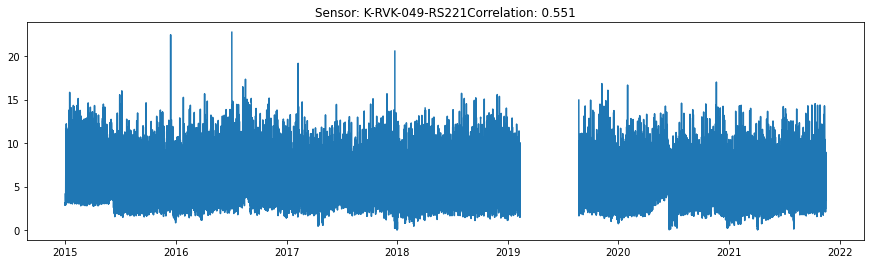

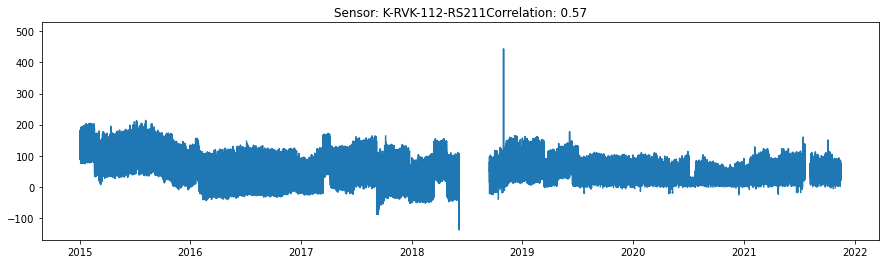

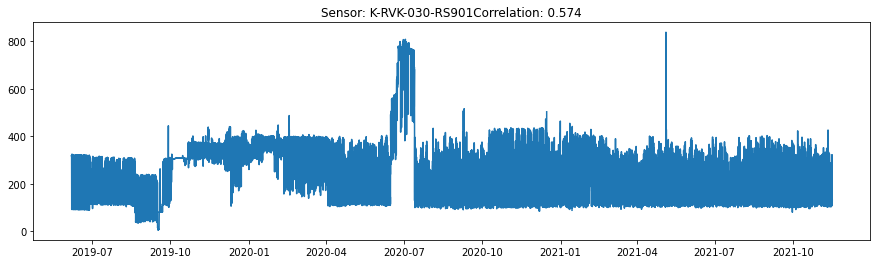

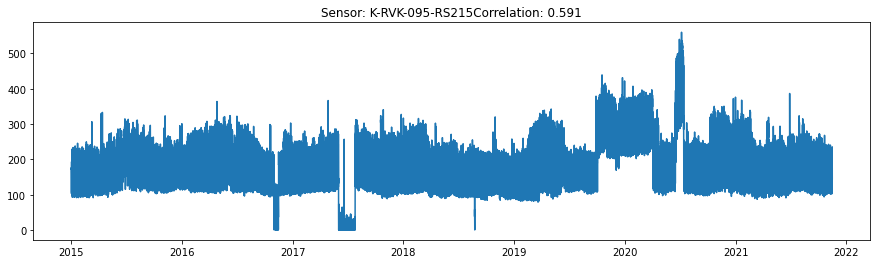

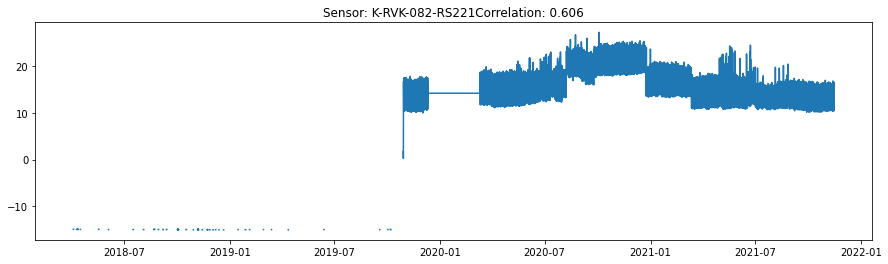

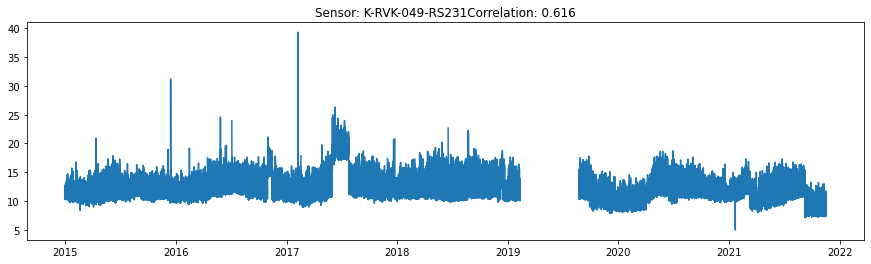

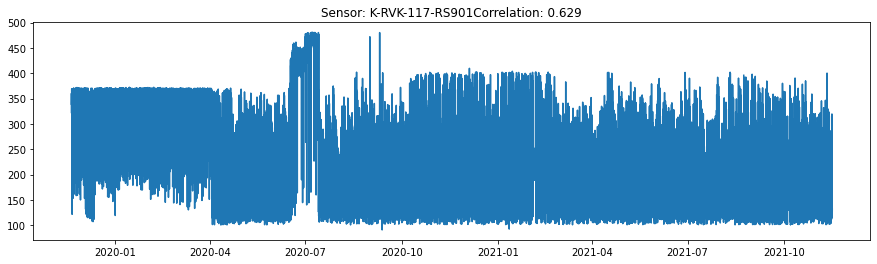

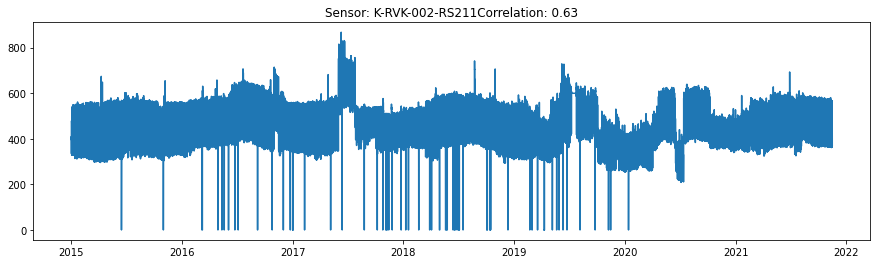

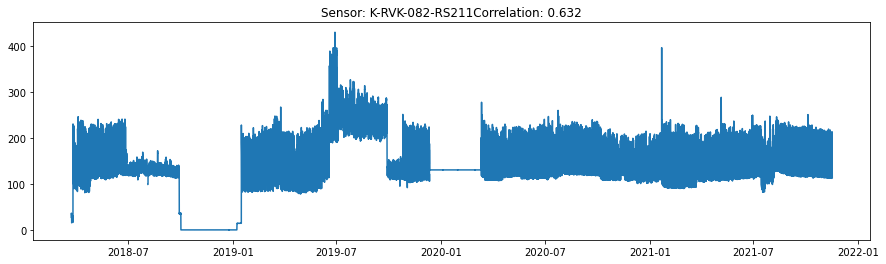

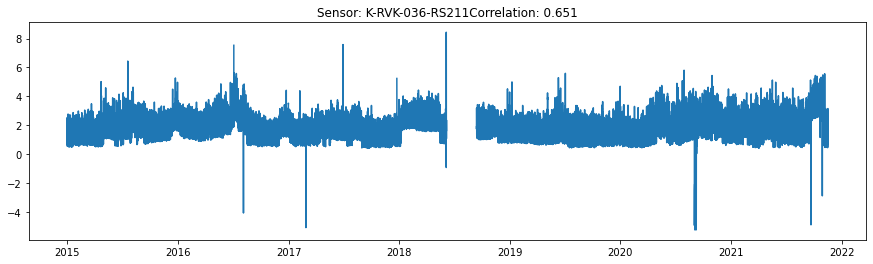

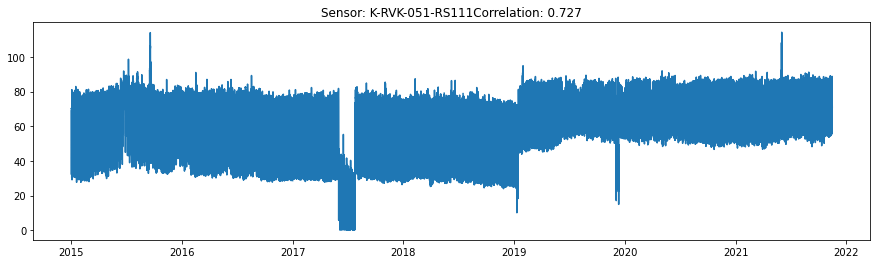

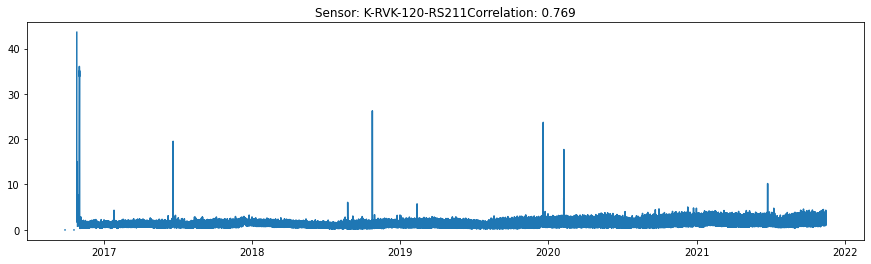

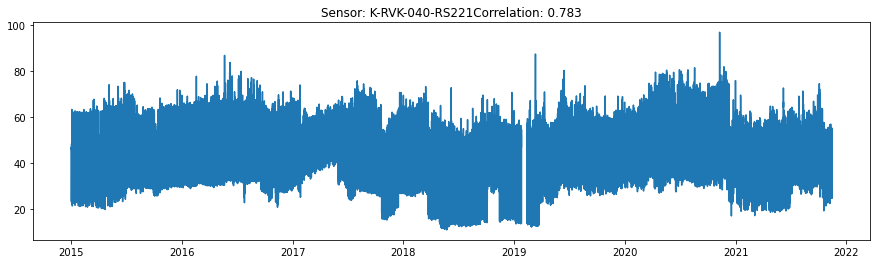

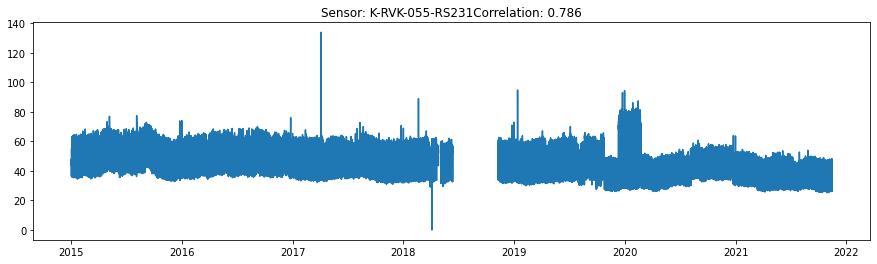

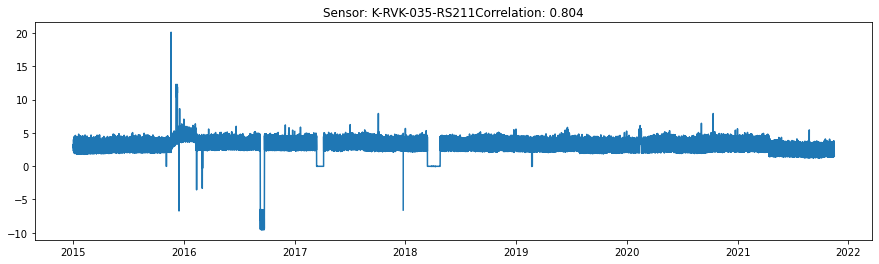

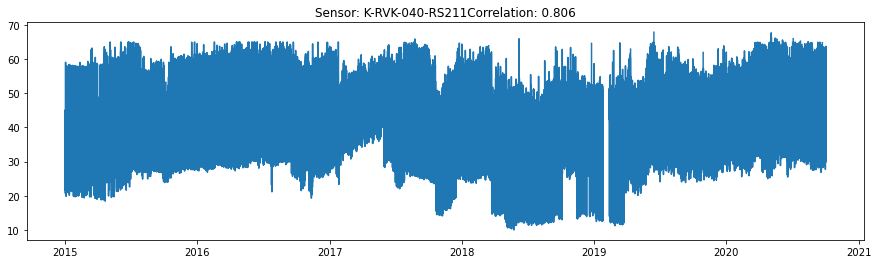

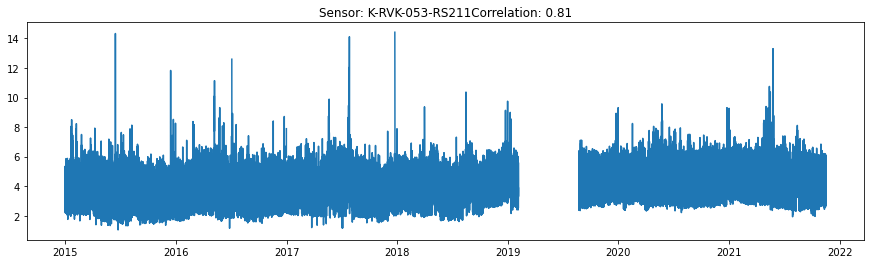

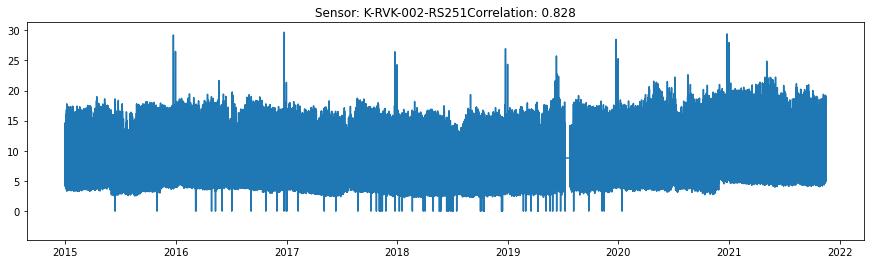

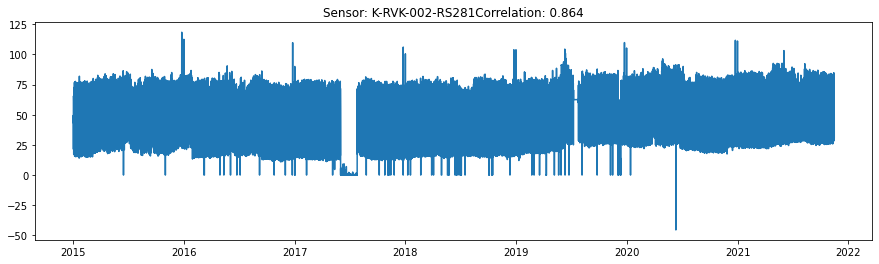

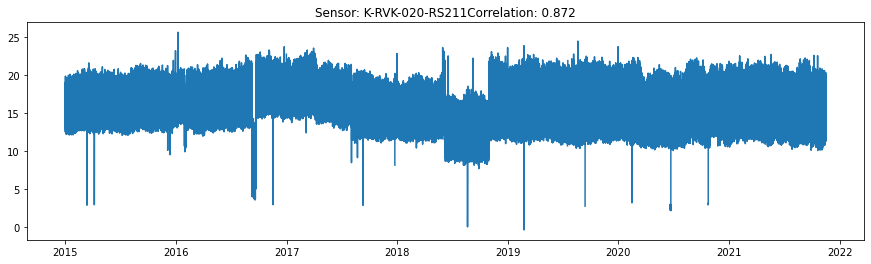

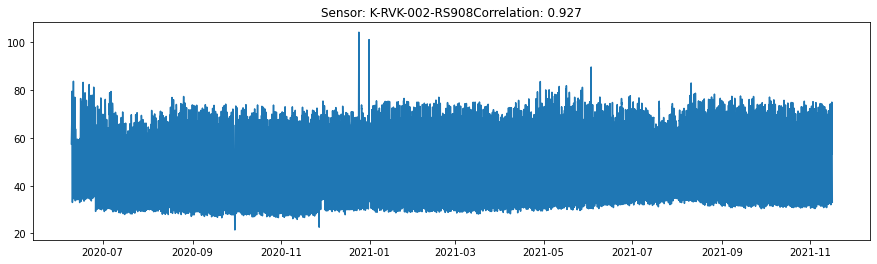

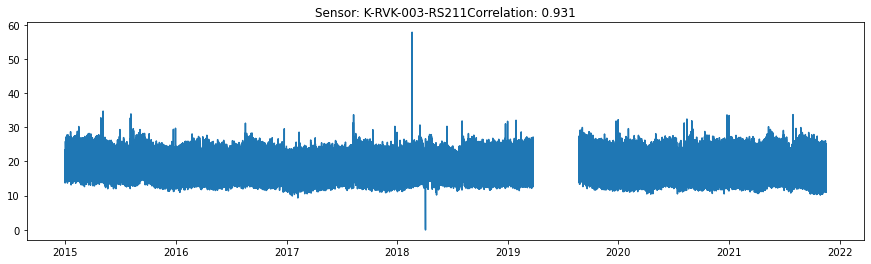

In [ ]:
for _,row in df_results.sort_values('corr_ohe_test_ToD').iterrows():
    name = row['name']
    corr = row['corr_ohe_test_ToD']
    plt.figure(figsize=(15,4))
    plt.plot(df_cold_wide.loc[:,name])
    plt.title('Sensor: ' + str(name) + 'Correlation: ' + str(np.round(corr,3)))
    plt.show()

NameError: name 'df_results' is not defined

In [ ]:
'K-RVK-'